This is needed to reload modules without restarting the kernel

In [523]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


This is needed to add eda_tools from the directories above

In [60]:
import os
os.sys.path.append('../../')

In [61]:
from eda_tools.histogram_helper import bin_midpoint  

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import uproot

In [295]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [317]:
print("H")

H


# XGBoost Weights Analysis

Let's look at the weights we are getting from XGBoost

In [4]:
!ls -lh /mnt/storage/lborgna/NNT/MDR_VEC/data/xgboost/weights

total 965M
-rw-r--r-- 1 lborgna users 105M Mar  9 14:37 dat_NN_d24_16_bootstrap_0.root
-rw-r--r-- 1 lborgna users  96M Mar  9 14:37 dat_NN_d24_16_bootstrap_1.root
-rw-r--r-- 1 lborgna users  96M Mar  9 14:37 dat_NN_d24_16_bootstrap_2.root
-rw-r--r-- 1 lborgna users  96M Mar  9 14:37 dat_NN_d24_16_bootstrap_3.root
-rw-r--r-- 1 lborgna users  96M Mar  9 14:37 dat_NN_d24_16_bootstrap_4.root
-rw-r--r-- 1 lborgna users  96M Mar  9 14:38 dat_NN_d24_16_bootstrap_5.root
-rw-r--r-- 1 lborgna users  96M Mar  9 14:38 dat_NN_d24_16_bootstrap_6.root
-rw-r--r-- 1 lborgna users  96M Mar  9 14:38 dat_NN_d24_16_bootstrap_7.root
-rw-r--r-- 1 lborgna users  96M Mar  9 14:38 dat_NN_d24_16_bootstrap_8.root
-rw-r--r-- 1 lborgna users  96M Mar  9 14:38 dat_NN_d24_16_bootstrap_9.root


In [11]:
storage = "/mnt/storage/lborgna/NNT/MDR_VEC/data/xgboost/weights/"

In [7]:
import uproot
import pandas as pd

In [37]:
import numpy as np

In [17]:
list_of_df= []

for i in range(10):
    f = uproot.open(storage + f'dat_NN_d24_16_bootstrap_{i}.root')
    df = f['control'].pandas.df()
    df.set_index(['event_number','run_number'], inplace=True)
    list_of_df.append(df)

In [18]:
df= pd.concat(list_of_df, axis=1)

In [21]:
df.reset_index(inplace= True)

In [26]:
df.head()

event_number  run_number  NN_d24_weight  NN_d24_weight_resampling_0  \
0        808585      298773       0.006527                    0.007084   
1       1798465      298773       0.003317                    0.003345   
2       1855518      298773       0.007970                    0.006007   
3       1671576      298773       0.006385                    0.006200   
4       1711116      298773       0.078737                    0.074262   

   NN_d24_weight_resampling_1  NN_d24_weight_resampling_2  \
0                    0.006122                    0.006620   
1                    0.003197                    0.003665   
2                    0.007163                    0.007747   
3                    0.006133                    0.005276   
4                    0.079882                    0.099087   

   NN_d24_weight_resampling_3  NN_d24_weight_resampling_4  \
0                    0.005310                    0.005940   
1                    0.003180                    0.003065   
2                    0.008027                    0.006043   
3                    0.005578                    0.006042   
4                    0.068178                    0.067375   

   NN_d24_weight_resampling_5  NN_d24_weight_resampling_6  ...  \
0                    0.005812                    0.006471  ...   
1                    0.003822                    0.003766  ...   
2                    0.006670                    0.010987  ...   
3                    0.006567                    0.005795  ...   
4                    0.061608                    0.074993  ...   

   NN_d24_weight_resampling_90  NN_d24_weight_resampling_91  \
0                     0.006321                     0.005614   
1                     0.003292                     0.003347   
2                     0.006134                     0.006464   
3                     0.006620                     0.006703   
4                     0.072166                     0.073347   

   NN_d24_weight_resampling_92  NN_d24_weight_resampling_93  \
0                     0.006612                     0.005586   
1                     0.003346                     0.003289   
2                     0.006879                     0.007200   
3                     0.007158                     0.005476   
4                     0.074643                     0.064162   

   NN_d24_weight_resampling_94  NN_d24_weight_resampling_95  \
0                     0.005394                     0.006533   
1                     0.003533                     0.003775   
2                     0.007669                     0.006694   
3                     0.006445                     0.007033   
4                     0.077574                     0.046451   

   NN_d24_weight_resampling_96  NN_d24_weight_resampling_97  \
0                     0.005163                     0.005043   
1                     0.003425                     0.003149   
2                     0.006928                     0.006039   
3                     0.006594                     0.006396   
4                     0.078054                     0.080543   

   NN_d24_weight_resampling_98  NN_d24_weight_resampling_99  
0                     0.006997                     0.006435  
1                     0.003442                     0.003567  
2                     0.007641                     0.006271  
3                     0.005903                     0.006487  
4                     0.064223                     0.071990  

[5 rows x 103 columns]

In [116]:
storage = "/mnt/storage/lborgna/NNT/MDR_VEC/data/weights_nominal/"

In [117]:
list_of_df= []

for i in range(5):
    f = uproot.open(storage + f'dat_NN_d24_16_bootstrap_{i}.root')
    _df = f['control'].pandas.df()
    _df.set_index(['event_number','run_number'], inplace=True)
    list_of_df.append(_df)

In [118]:
dfN = pd.concat(list_of_df, axis = 1)
dfN.reset_index(inplace = True)

In [285]:
dfN

event_number  run_number  NN_d24_weight  NN_d24_weight_resampling_0  \
215728         80223      302831       0.016711                    0.025473   
215726        136620      302831       0.006087                    0.012778   
235382        220246      303266       0.001572                    0.004415   
90862         270447      301915       0.000483                    0.001215   
215727        389817      302831       0.000860                    0.000898   
...              ...         ...            ...                         ...   
218694    7038286399      302872       0.057415                    0.089118   
218754    7039065697      302872       0.013994                    0.008959   
218610    7039658524      302872       0.003985                    0.007046   
218695    7039811760      302872       0.007310                    0.011177   
218611    7039834940      302872       0.027724                    0.016680   

        NN_d24_weight_resampling_1  NN_d24_weight_resampling_2  \
215728                    0.032127                    0.037110   
215726                    0.015339                    0.009287   
235382                    0.002191                    0.002832   
90862                     0.001536                    0.001523   
215727                    0.001112                    0.001980   
...                            ...                         ...   
218694                    0.097717                    0.145758   
218754                    0.007920                    0.016417   
218610                    0.009172                    0.004640   
218695                    0.012319                    0.008514   
218611                    0.022399                    0.023450   

        NN_d24_weight_resampling_3  NN_d24_weight_resampling_4  \
215728                    0.023314                    0.017143   
215726                    0.010674                    0.013089   
235382                    0.003494                    0.002767   
90862                     0.001001                    0.001858   
215727                    0.000898                    0.001218   
...                            ...                         ...   
218694                    0.043009                    0.081870   
218754                    0.018287                    0.010216   
218610                    0.003458                    0.002717   
218695                    0.007098                    0.006375   
218611                    0.022653                    0.014475   

        NN_d24_weight_resampling_5  NN_d24_weight_resampling_6  ...  \
215728                    0.047454                    0.027738  ...   
215726                    0.007149                    0.009821  ...   
235382                    0.001260                    0.001304  ...   
90862                     0.000819                    0.000373  ...   
215727                    0.000958                    0.000226  ...   
...                            ...                         ...  ...   
218694                    0.115265                    0.058566  ...   
218754                    0.013715                    0.005356  ...   
218610                    0.010953                    0.003851  ...   
218695                    0.017731                    0.007149  ...   
218611                    0.020972                    0.017743  ...   

        NN_d24_weight_resampling_90  NN_d24_weight_resampling_91  \
215728                     0.020130                     0.023311   
215726                     0.009216                     0.005715   
235382                     0.001969                     0.001469   
90862                      0.001591                     0.002812   
215727                     0.000799                     0.000652   
...                             ...                          ...   
218694                     0.094583                     0.060423   
218754                     0.014548                     0.009315   
218610  

In [119]:
dfN

event_number  run_number  NN_d24_weight  NN_d24_weight_resampling_0  \
0              808585      298773       0.010655                    0.008467   
1             1798465      298773       0.005173                    0.002678   
2             1855518      298773       0.007624                    0.005139   
3             1671576      298773       0.003887                    0.003803   
4             1711116      298773       0.232618                    0.179764   
...               ...         ...            ...                         ...   
1058569    2056658727      310872       0.005095                    0.003570   
1058570    2056230789      310872       0.008209                    0.010285   
1058571    2059961684      310872       0.005633                    0.004026   
1058572     752614167      310872       0.004405                    0.004114   
1058573     752458951      310872       0.007759                    0.004288   

         NN_d24_weight_resampling_1  NN_d24_weight_resampling_2  \
0                          0.009918                    0.009848   
1                          0.001856                    0.002089   
2                          0.003622                    0.004678   
3                          0.003162                    0.002736   
4                          0.101284                    0.336067   
...                             ...                         ...   
1058569                    0.005468                    0.003669   
1058570                    0.014217                    0.009338   
1058571                    0.005169                    0.006855   
1058572                    0.003683                    0.002218   
1058573                    0.005689                    0.004107   

         NN_d24_weight_resampling_3  NN_d24_weight_resampling_4  \
0                          0.007918                    0.007355   
1                          0.001019                    0.001434   
2                          0.004421                    0.011549   
3                          0.003024                    0.002514   
4                          0.163918                    0.114402   
...                             ...                         ...   
1058569                    0.001824                    0.002894   
1058570                    0.017514                    0.008161   
1058571                    0.004898                    0.004634   
1058572                    0.005450                    0.004356   
1058573                    0.003315                    0.003729   

         NN_d24_weight_resampling_5  NN_d24_weight_resampling_6  ...  \
0                          0.008083                    0.013067  ...   
1                          0.005768                    0.003120  ...   
2                          0.010170                    0.006973  ...   
3                          0.002633                    0.001918  ...   
4                          0.111377                    0.149520  ...   
...                             ...                         ...  ...   
1058569                    0.007663                    0.003648  ...   
1058570                    0.005334                    0.007550  ...   
1058571                    0.005583                    0.009428  ...   
1058572                    0.002728                    0.002234  ...   
1058573                    0.002849                    0.004645  ...   

         NN_d24_weight_resampling_90  NN_d24_weight_resampling_91  \
0                           0.010032                     0.007418   
1                           0.002285                     0.001448   
2                           0.007039                     0.021547   
3                           0.003689                     0.001971   
4                           0.171889                     0.096286   
...                              ...                          ...   
1058569                     0.004507                     0.003499   
1058570              

In [27]:
w_df = df.iloc[:,3:]

In [28]:
w_df

NN_d24_weight_resampling_0  NN_d24_weight_resampling_1  \
0                          0.007084                    0.006122   
1                          0.003345                    0.003197   
2                          0.006007                    0.007163   
3                          0.006200                    0.006133   
4                          0.074262                    0.079882   
...                             ...                         ...   
1058569                    0.004111                    0.003909   
1058570                    0.008054                    0.008616   
1058571                    0.005862                    0.006979   
1058572                    0.006555                    0.006692   
1058573                    0.004288                    0.004418   

         NN_d24_weight_resampling_2  NN_d24_weight_resampling_3  \
0                          0.006620                    0.005310   
1                          0.003665                    0.003180   
2                          0.007747                    0.008027   
3                          0.005276                    0.005578   
4                          0.099087                    0.068178   
...                             ...                         ...   
1058569                    0.003965                    0.003386   
1058570                    0.007678                    0.008281   
1058571                    0.006149                    0.004756   
1058572                    0.006937                    0.007153   
1058573                    0.005983                    0.005381   

         NN_d24_weight_resampling_4  NN_d24_weight_resampling_5  \
0                          0.005940                    0.005812   
1                          0.003065                    0.003822   
2                          0.006043                    0.006670   
3                          0.006042                    0.006567   
4                          0.067375                    0.061608   
...                             ...                         ...   
1058569                    0.003804                    0.004134   
1058570                    0.009288                    0.008638   
1058571                    0.005682                    0.005500   
1058572                    0.006425                    0.006615   
1058573                    0.005268                    0.004021   

         NN_d24_weight_resampling_6  NN_d24_weight_resampling_7  \
0                          0.006471                    0.005824   
1                          0.003766                    0.003463   
2                          0.010987                    0.005676   
3                          0.005795                    0.005390   
4                          0.074993                    0.062526   
...                             ...                         ...   
1058569                    0.003633                    0.003847   
1058570                    0.008779                    0.008128   
1058571                    0.006160                    0.006725   
1058572                    0.006878                    0.006365   
1058573                    0.005411                    0.004827   

         NN_d24_weight_resampling_8  NN_d24_weight_resampling_9  ...  \
0                          0.007063                    0.004850  ...   
1                          0.003075                    0.003098  ...   
2                          0.005977                    0.009069  ...   
3                          0.006755                    0.006656  ...   
4                          0.067961                    0.072839  ...   
...                             ...                         ...  ...   
1058569                    0.003822                    0.003844  ...   
1058570                    0.007231                    0.007690  ...   
1058571                    0.006070                    0.005106  ...   
1058572                    0.006101                    0.006944  ... 

In [120]:
event_id = dfN[['event_number','run_number']].values

In [122]:
event_id.shape

(1058574, 2)

In [125]:
idx = np.random.choice(1058574, 25)

In [126]:
idx

array([ 788820,  467404,  917628, 1042613,  822850,  866864,  528624,
        889245,  784699,  152915,  482366,  365694,   56382,  542362,
        450808,  116400,  195236,  380032,  792380,  551763,   51625,
        240601,  602064,  345274,   68023])

In [130]:
event_num = event_id[idx, 0]
run_num = event_id[idx, 1]

In [131]:
dfN_t = dfN.loc[dfN['event_number'].isin(event_num)  & dfN['run_number'].isin(run_num)]
df_t = df.loc[df['event_number'].isin(event_num) & df['run_number'].isin(run_num)]

In [135]:
w_n = dfN_t.iloc[:,3:]
w = df_t.iloc[:,3:]

In [31]:
import matplotlib.pyplot as plt

In [42]:
import seaborn as sns

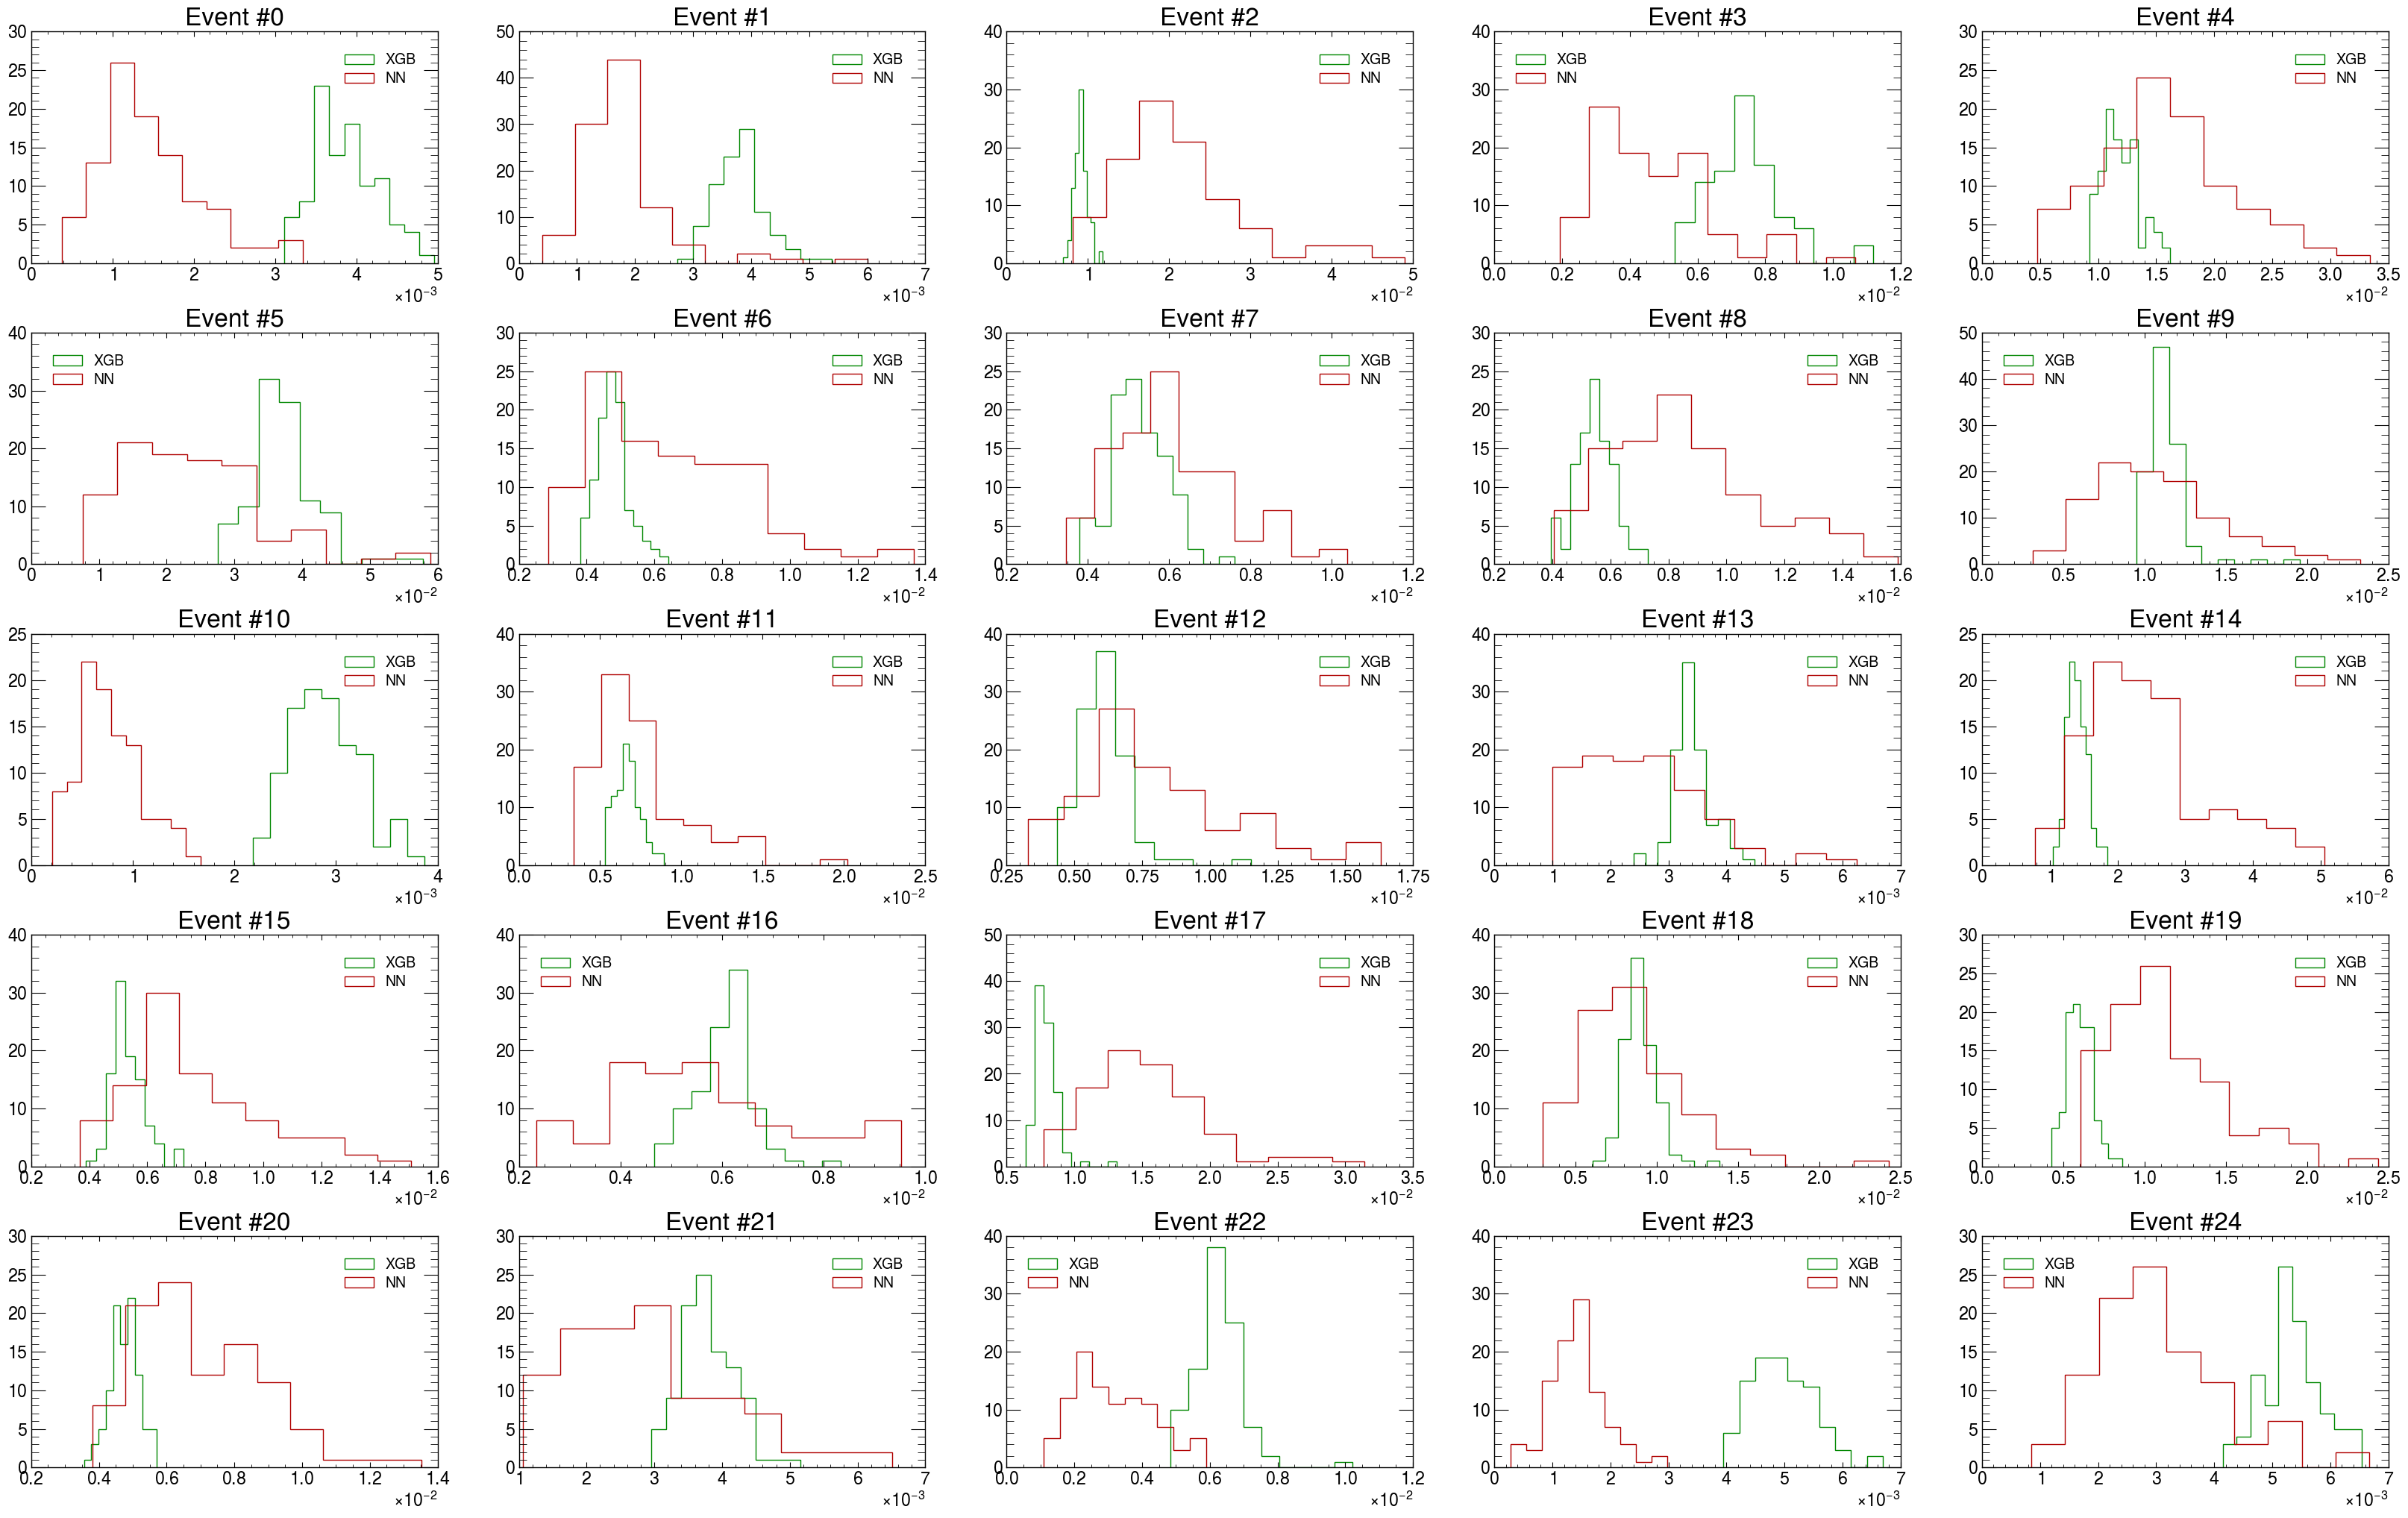

In [202]:
fig, axs = plt.subplots(5,5, figsize = (40, 25))
fig.subplots_adjust(hspace = .3)
axs = axs.ravel()

for i in range(25):
    axs[i].hist(w.iloc[i,:].values, bins = 10, histtype = 'step', label = 'XGB')
    axs[i].hist(w_n.iloc[i,:].values, bins = 10, histtype='step', label = 'NN')
    axs[i].set_title('Event #' + str(i))
    axs[i].legend()


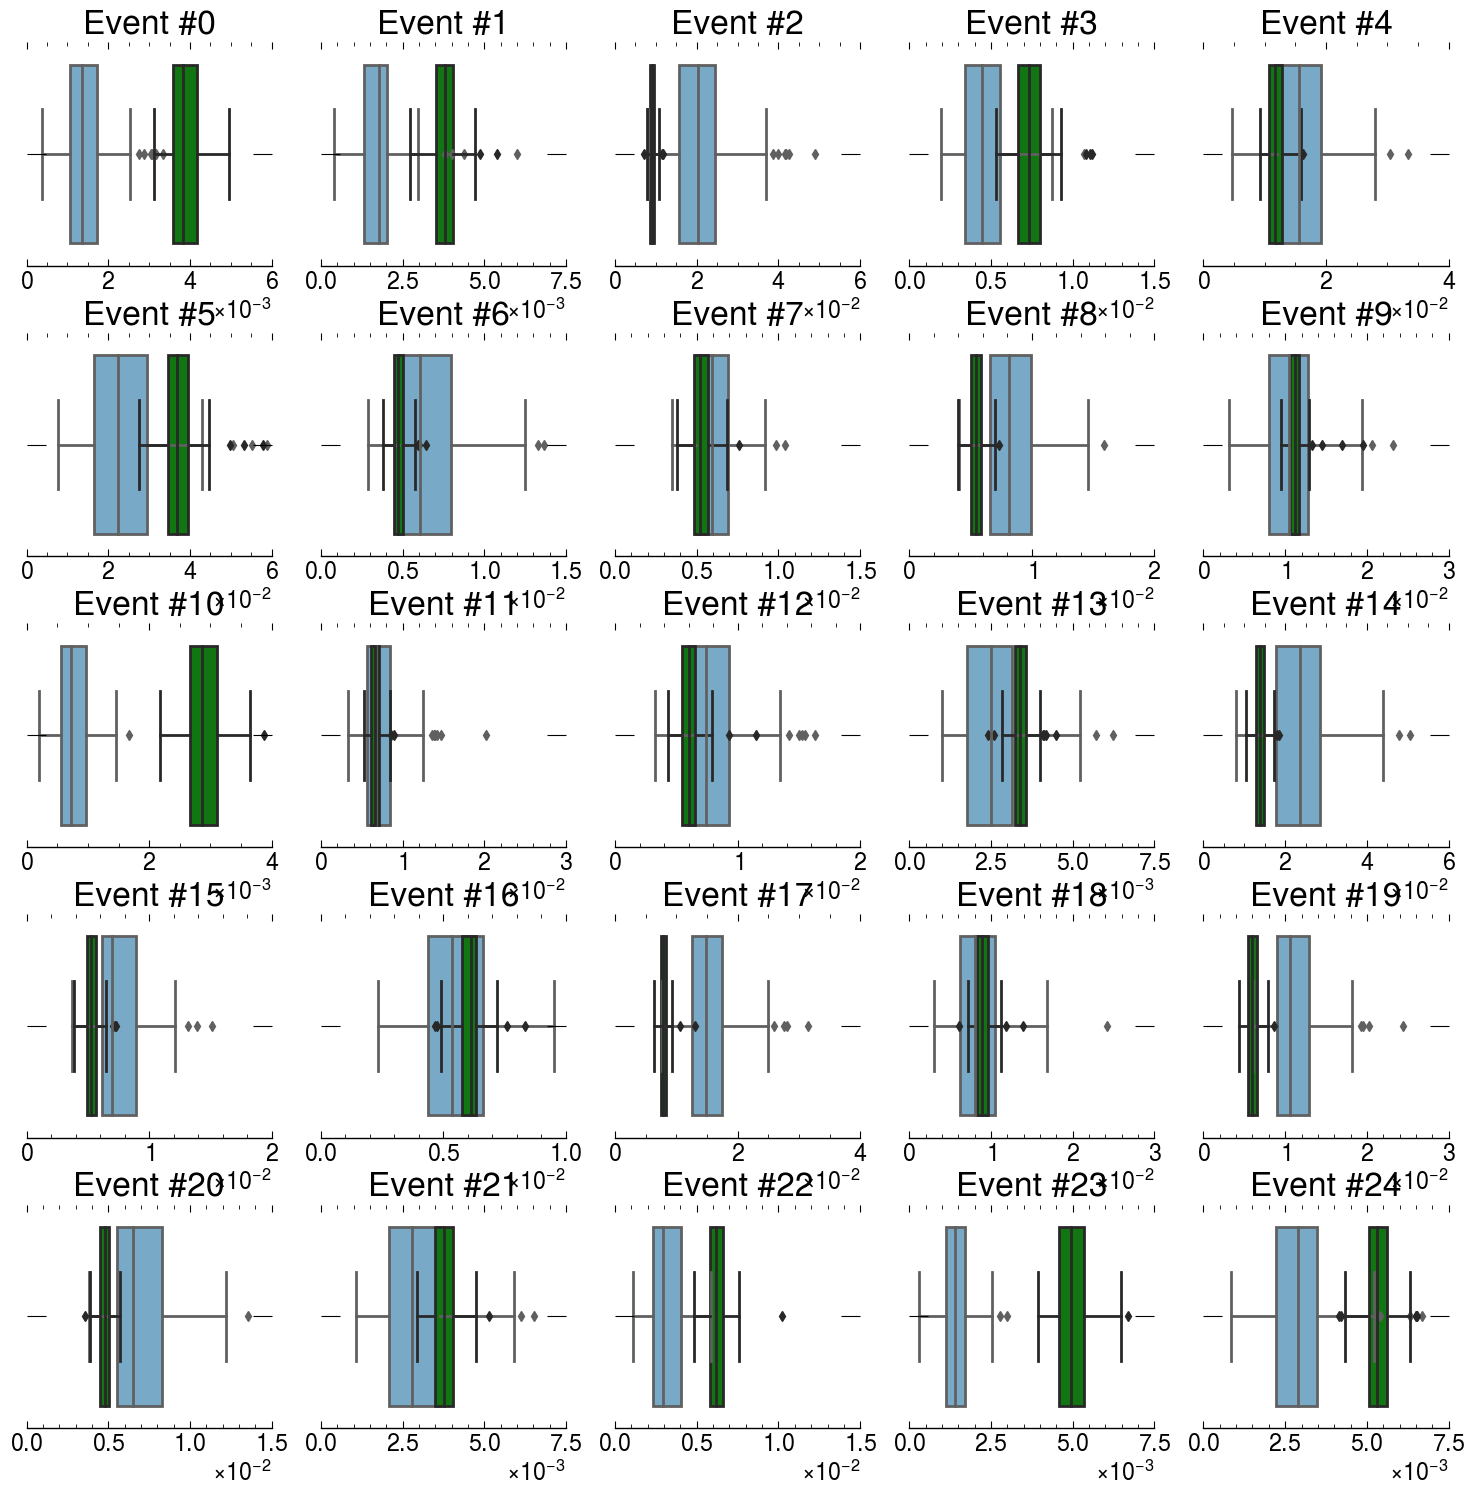

In [186]:
fig, axs = plt.subplots(5,5, figsize = (18, 18))
fig.subplots_adjust(hspace = .3)
axs = axs.ravel()

for i in range(25):
    #std = np.std(w_df.iloc[i,:].values)
    #iqr = np.subtract(*np.percentile((w_df.iloc[i,:].values), [75, 25]))

    sns.boxplot(w_n.iloc[i,:].values, ax = axs[i], palette = 'Blues')
    sns.boxplot(w.iloc[i, :].values, ax = axs[i])
    
    
    axs[i].set_title('Event #' + str(i) )#+ ' - ' + '$\sigma$={:.3f}'.format(std) + ' IQR: {:.3f}'.format(iqr))
    sns.despine(left = True)


# Histograms of each bootstrap

In [45]:
from hh4b_utils.nnt_tools import load_nnt

In [46]:
storage = "/mnt/storage/lborgna/NNT/MDR_VEC/data/xgboost/"
fp16 = storage + 'data_MDR_VEC_16_with_weights.root'
fd16 = uproot.open(fp16)
data16 = load_nnt(fp16)

In [52]:
df

event_number  run_number  NN_d24_weight  NN_d24_weight_resampling_0  \
0              808585      298773       0.006527                    0.007084   
1             1798465      298773       0.003317                    0.003345   
2             1855518      298773       0.007970                    0.006007   
3             1671576      298773       0.006385                    0.006200   
4             1711116      298773       0.078737                    0.074262   
...               ...         ...            ...                         ...   
1058569    2056658727      310872       0.003509                    0.004111   
1058570    2056230789      310872       0.007985                    0.008054   
1058571    2059961684      310872       0.005649                    0.005862   
1058572     752614167      310872       0.006459                    0.006555   
1058573     752458951      310872       0.004712                    0.004288   

         NN_d24_weight_resampling_1  NN_d24_weight_resampling_2  \
0                          0.006122                    0.006620   
1                          0.003197                    0.003665   
2                          0.007163                    0.007747   
3                          0.006133                    0.005276   
4                          0.079882                    0.099087   
...                             ...                         ...   
1058569                    0.003909                    0.003965   
1058570                    0.008616                    0.007678   
1058571                    0.006979                    0.006149   
1058572                    0.006692                    0.006937   
1058573                    0.004418                    0.005983   

         NN_d24_weight_resampling_3  NN_d24_weight_resampling_4  \
0                          0.005310                    0.005940   
1                          0.003180                    0.003065   
2                          0.008027                    0.006043   
3                          0.005578                    0.006042   
4                          0.068178                    0.067375   
...                             ...                         ...   
1058569                    0.003386                    0.003804   
1058570                    0.008281                    0.009288   
1058571                    0.004756                    0.005682   
1058572                    0.007153                    0.006425   
1058573                    0.005381                    0.005268   

         NN_d24_weight_resampling_5  NN_d24_weight_resampling_6  ...  \
0                          0.005812                    0.006471  ...   
1                          0.003822                    0.003766  ...   
2                          0.006670                    0.010987  ...   
3                          0.006567                    0.005795  ...   
4                          0.061608                    0.074993  ...   
...                             ...                         ...  ...   
1058569                    0.004134                    0.003633  ...   
1058570                    0.008638                    0.008779  ...   
1058571                    0.005500                    0.006160  ...   
1058572                    0.006615                    0.006878  ...   
1058573                    0.004021                    0.005411  ...   

         NN_d24_weight_resampling_90  NN_d24_weight_resampling_91  \
0                           0.006321                     0.005614   
1                           0.003292                     0.003347   
2                           0.006134                     0.006464   
3                           0.006620                     0.006703   
4                           0.072166                     0.073347   
...                              ...                          ...   
1058569                     0.003774                     0.004128   
1058570              

In [53]:
d16_cr = data16.merge(df, how = 'inner', on = ['event_number','run_number'])

In [55]:
mask_2b = d16_cr['ntag'] == 2
mask_4b = d16_cr['ntag'] >= 4


In [62]:
be = np.linspace(200, 1200, 51)
x = bin_midpoint(be)

In [63]:
y_4b, _ = np.histogram(d16_cr.loc[mask_4b,'m_hh'].values, bins=be)

In [71]:
from eda_tools.utilities import getNorm

In [74]:
import mplhep as hep
hep.set_style("ATLAS") # string aliases work too

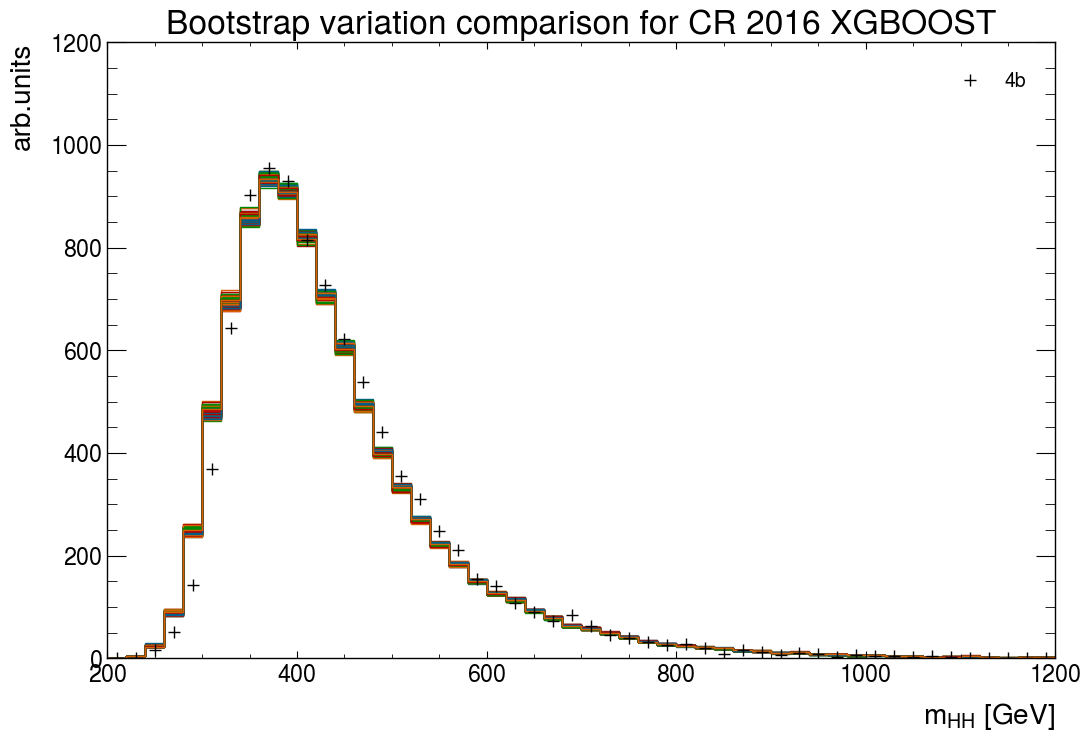

In [81]:
f, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, y_4b, "k+", label="4b")
histos = np.zeros([100, 50])
for i in range(100):
    
    w_col = f"NN_d24_weight_resampling_{i}"
    mu = getNorm(d16_cr, k = 2, weight_column= w_col)
    
    h_i, _, _ =  ax.hist(
        d16_cr.loc[mask_2b, "m_hh"].values,
        bins=be,
        weights= mu * d16_cr.loc[mask_2b, w_col].values,
        histtype='step',
    )

    histos[i,:] = h_i
    
ax.set_ylabel('arb.units')
ax.set_xlabel('$m_{HH}$ [GeV]')
ax.set_title('Bootstrap variation comparison for CR 2016 XGBOOST')
ax.legend()



In [91]:
histos[0,0]

0.19564522263744652

In [99]:
histos[:,0]

(100,)

In [100]:
bin_min = np.zeros(50)
bin_max = np.zeros(50)

for i in range(50):
    bin_min[i] = np.min(histos[:,i])
    bin_max[i] = np.max(histos[:,i])
    

In [103]:
variation = bin_max - bin_min

In [104]:
variation

array([ 0.12570627,  1.56186419,  8.0691491 , 13.30916418, 25.31109305,
       38.7226036 , 41.35682015, 38.71073147, 33.52256565, 30.09564465,
       32.75958926, 28.7096864 , 27.82938077, 25.92629677, 21.12456697,
       19.23481576, 15.33134688, 12.24945789, 10.11947001,  9.57783235,
        9.08913668, 10.6879878 ,  8.16455761,  7.70051131,  6.22111032,
        7.386418  ,  6.36169156,  4.95429862,  3.89741469,  4.20367259,
        3.42646444,  3.71033443,  3.09340867,  3.36138554,  3.20070683,
        2.53043164,  3.00792156,  1.91955214,  1.65665096,  1.57273003,
        1.47690346,  1.26118322,  1.04653641,  1.13081585,  0.87484326,
        2.56904929,  0.90955931,  0.61981097,  0.61947021,  0.80533649])

In [102]:
bin_max

array([2.95620102e-01, 5.14315099e+00, 2.93054576e+01, 9.58049360e+01,
       2.62259572e+02, 5.00176521e+02, 7.17052695e+02, 8.79394909e+02,
       9.49630167e+02, 9.25482275e+02, 8.35267179e+02, 7.18890236e+02,
       6.19477227e+02, 5.05172645e+02, 4.11444245e+02, 3.40767903e+02,
       2.77104364e+02, 2.27644256e+02, 1.88526254e+02, 1.55132476e+02,
       1.31352562e+02, 1.19911606e+02, 9.68919723e+01, 8.27426052e+01,
       6.62500486e+01, 6.16517762e+01, 5.29131662e+01, 4.36141319e+01,
       3.47167898e+01, 2.95437455e+01, 2.60698779e+01, 2.32257698e+01,
       2.09947897e+01, 1.67290146e+01, 1.55497322e+01, 1.15469224e+01,
       1.32119321e+01, 8.58327674e+00, 7.78260389e+00, 6.25867474e+00,
       6.62800984e+00, 5.29839390e+00, 4.00060372e+00, 3.36629113e+00,
       3.52902529e+00, 5.36224624e+00, 2.84248471e+00, 1.65884445e+00,
       1.91481457e+00, 2.15127575e+00])

In [38]:
np.log(0.007)

-4.961845129926823

In [106]:
bs_error = np.array([           np.nan, 7.79188481e+00, 3.68465354e+00, 2.91431586e+00,
       2.91390799e-01, 2.17787790e-03, 2.39039812e-01, 2.62433311e-01,
       3.40416749e-01, 3.28633992e-01, 3.05324975e-01, 2.09725215e-01,
       1.61537139e-01, 1.44791597e-01, 2.00056984e-01, 1.96680904e-01,
       4.90565766e-01, 4.25596920e-01, 4.09265187e-01, 2.90633485e-01,
       7.76808975e-01, 9.37130491e-01, 7.97450962e-01, 9.90796996e-01,
       1.46909847e+00, 1.16283888e+00, 1.54386126e+00, 1.77670677e+00,
       1.83911519e+00, 2.23655526e+00, 1.87274415e+00, 2.31270770e+00,
       2.35536002e+00, 2.13332174e+00, 3.63717830e+00, 3.33400281e+00,
       2.58380768e+00, 3.82349611e+00, 2.92909320e+00, 5.43180358e+00,
       3.86147665e+00, 3.56291089e+00, 3.44299083e+00, 3.52823130e+00,
       3.82339954e+00, 3.18136551e+00, 4.59756563e+00, 4.54792846e+00,
       4.55349662e+00, 5.45748857e+00])

In [108]:
bs_error

array([           nan, 7.79188481e+00, 3.68465354e+00, 2.91431586e+00,
       2.91390799e-01, 2.17787790e-03, 2.39039812e-01, 2.62433311e-01,
       3.40416749e-01, 3.28633992e-01, 3.05324975e-01, 2.09725215e-01,
       1.61537139e-01, 1.44791597e-01, 2.00056984e-01, 1.96680904e-01,
       4.90565766e-01, 4.25596920e-01, 4.09265187e-01, 2.90633485e-01,
       7.76808975e-01, 9.37130491e-01, 7.97450962e-01, 9.90796996e-01,
       1.46909847e+00, 1.16283888e+00, 1.54386126e+00, 1.77670677e+00,
       1.83911519e+00, 2.23655526e+00, 1.87274415e+00, 2.31270770e+00,
       2.35536002e+00, 2.13332174e+00, 3.63717830e+00, 3.33400281e+00,
       2.58380768e+00, 3.82349611e+00, 2.92909320e+00, 5.43180358e+00,
       3.86147665e+00, 3.56291089e+00, 3.44299083e+00, 3.52823130e+00,
       3.82339954e+00, 3.18136551e+00, 4.59756563e+00, 4.54792846e+00,
       4.55349662e+00, 5.45748857e+00])

Text(0.5, 1.0, 'variation vs bootstrap error 2016 CR')

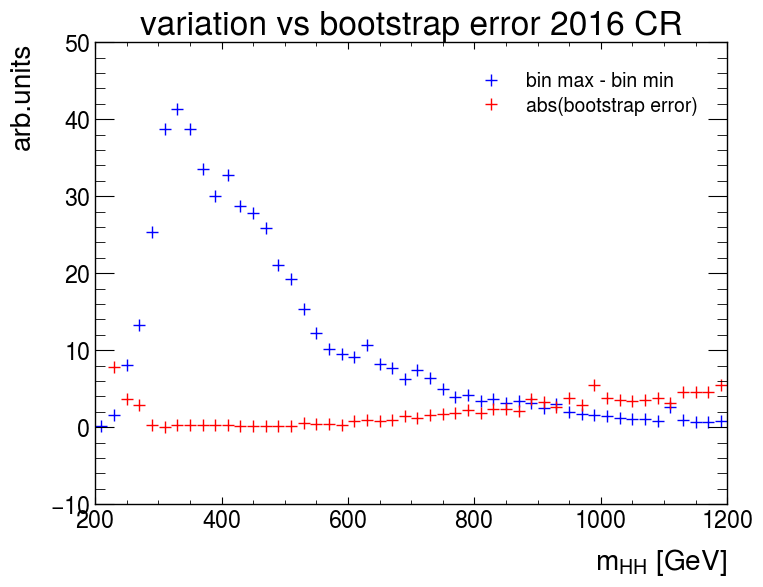

In [112]:
plt.plot(x, variation, 'b+', label = 'bin max - bin min')
plt.plot(x, bs_error, 'r+', label = 'abs(bootstrap error)')
plt.legend()
plt.xlabel('$m_{HH}$ [GeV]')
plt.ylabel('arb.units')
plt.title('variation vs bootstrap error 2016 CR')

In [149]:
df_t['model'] = 'XGBoost'

/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [147]:
dfN_t['model'] = 'NN'

/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [164]:
dfN_t['event_num'] = np.arange(0, 25) + 1
df_t['event_num'] = np.arange(0, 25) + 1

/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [165]:
stack = pd.concat([df_t, dfN_t])

In [178]:
keys = [c for c in df if c.startswith('NN_d24_weight_resampling')]

In [184]:
melted = pd.melt(stack, id_vars=['event_number','run_number','model','event_num'], value_vars=keys, value_name='weight')

<AxesSubplot:xlabel='event_num', ylabel='weight'>

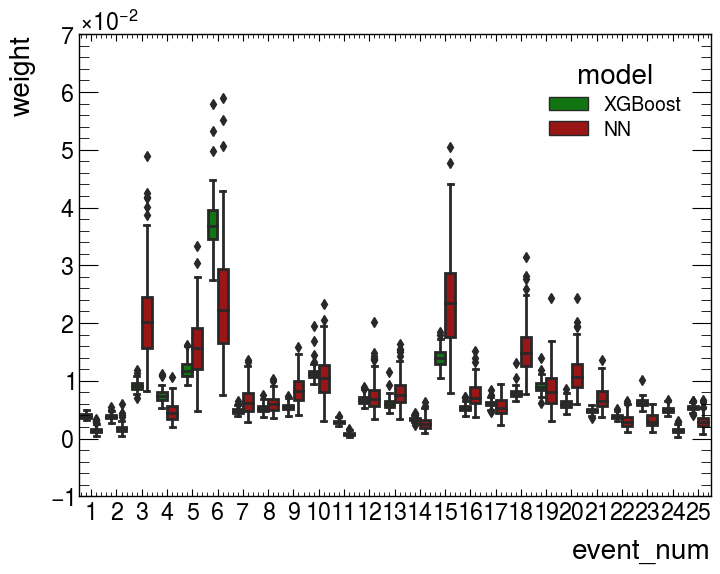

In [185]:
sns.boxplot(x='event_num',y='weight',hue='model', data = melted)

In [189]:
melted[melted['event_num']==1]

event_number  run_number    model  event_num  \
0       1114622507      300863  XGBoost          1   
1       2314266030      300863  XGBoost          2   
2       1078776538      300800  XGBoost          3   
3       3801044293      302300  XGBoost          4   
4       1640134395      301932  XGBoost          5   
...            ...         ...      ...        ...   
4995    3651167993      310341       NN         21   
4996    1152979942      311244       NN         22   
4997     176794720      310809       NN         23   
4998     609770457      311365       NN         24   
4999     790891358      311287       NN         25   

                         variable    weight  
0      NN_d24_weight_resampling_0  0.004160  
1      NN_d24_weight_resampling_0  0.003648  
2      NN_d24_weight_resampling_0  0.009376  
3      NN_d24_weight_resampling_0  0.008207  
4      NN_d24_weight_resampling_0  0.014923  
...                           ...       ...  
4995  NN_d24_weight_resampling_99  0.009009  
4996  NN_d24_weight_resampling_99  0.001643  
4997  NN_d24_weight_resampling_99  0.002184  
4998  NN_d24_weight_resampling_99  0.001517  
4999  NN_d24_weight_resampling_99  0.006673  

[5000 rows x 6 columns]

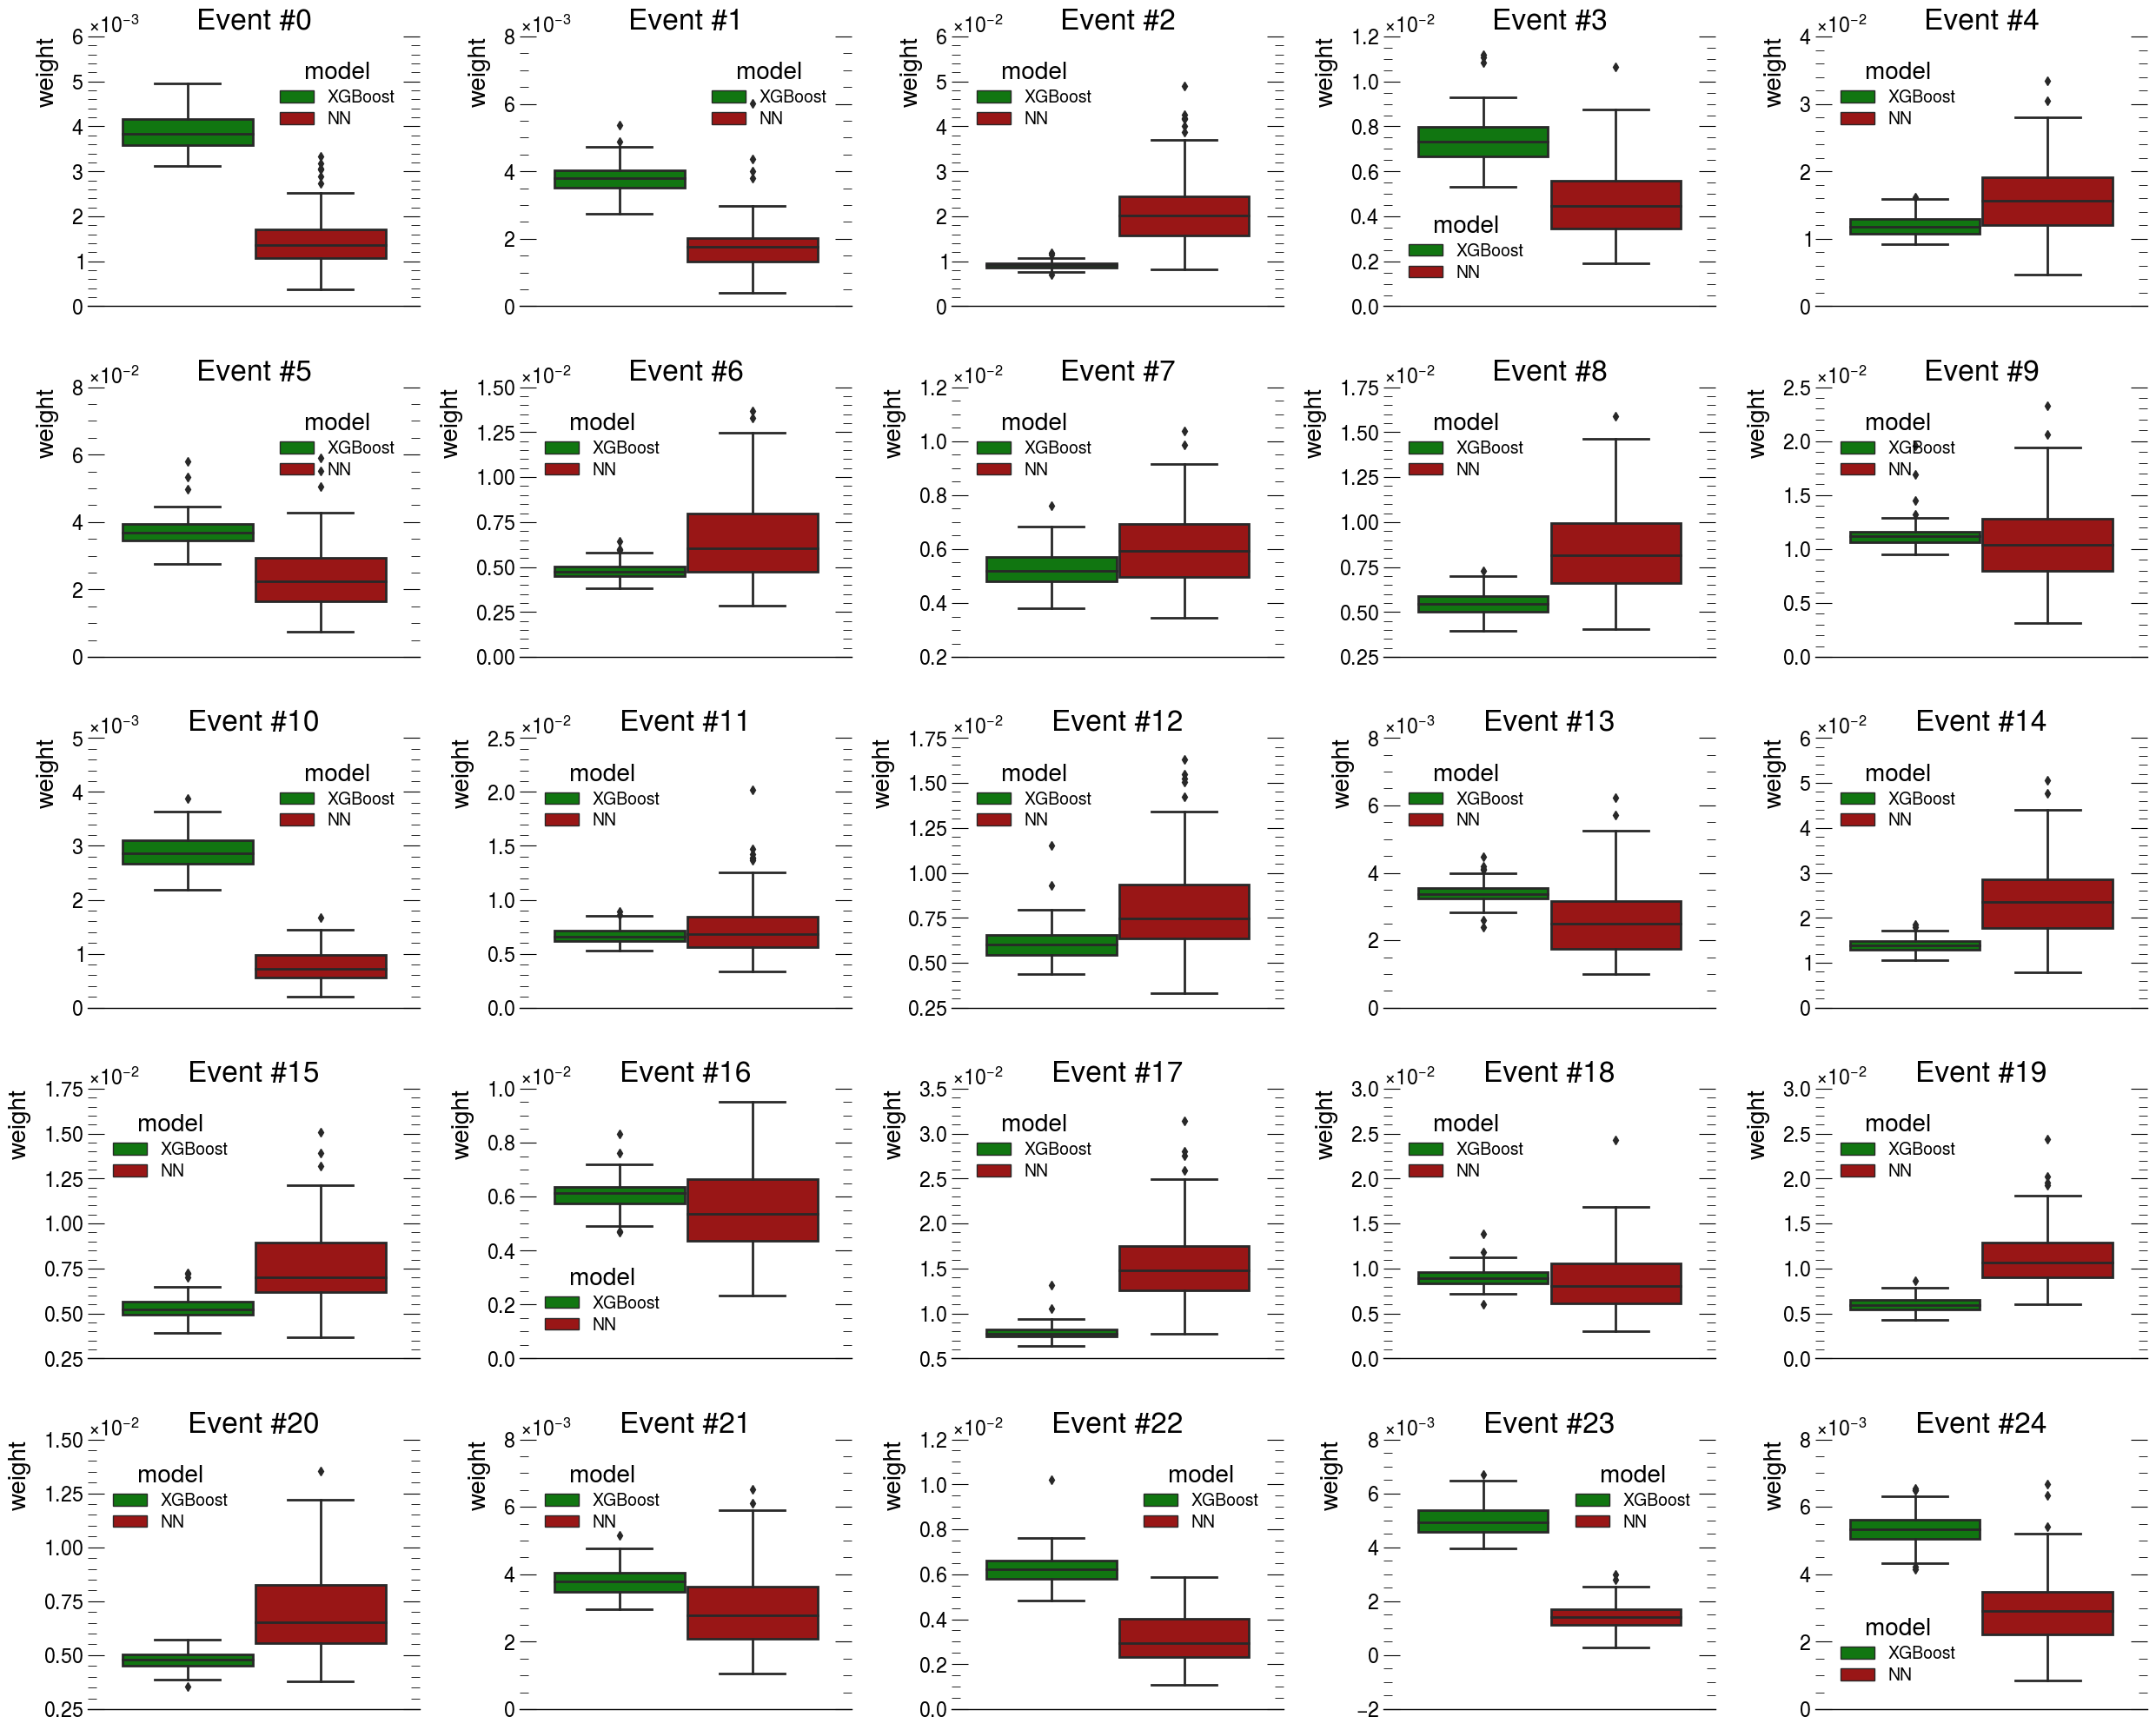

In [213]:
fig, axs = plt.subplots(5,5, figsize = (30, 25))
fig.subplots_adjust(hspace = .3, wspace=0.3)
axs = axs.ravel()

for i in range(25):
    #std = np.std(w_df.iloc[i,:].values)
    #iqr = np.subtract(*np.percentile((w_df.iloc[i,:].values), [75, 25]))
    
    sns.boxplot(x='event_num',y='weight',hue='model', data = melted[melted['event_num'] == i+1], ax = axs[i])

    #sns.boxplot(w_n.iloc[i,:].values, ax = axs[i], palette = 'Blues')
    #sns.boxplot(w.iloc[i, :].values, ax = axs[i])
    
    axs[i].set_title('Event #' + str(i) )#+ ' - ' + '$\sigma$={:.3f}'.format(std) + ' IQR: {:.3f}'.format(iqr))
    axs[i].get_xaxis().set_ticks([])
    axs[i].set_xticklabels([])
    axs[i].set(xticklabels=[])
    axs[i].get_xaxis().set_visible(False)
    sns.despine(left = True)



#### fig, axs = plt.subplots(5,5, figsize = (40, 25))
fig.subplots_adjust(hspace = .3)
axs = axs.ravel()

for i in range(25):
    #std = np.std(w_df.iloc[i,:].values)
    #iqr = np.subtract(*np.percentile((w_df.iloc[i,:].values), [75, 25]))
    
    sns.violinplot(x='event_num', y='weight', hue='model', data = melted[melted['event_num']==i+1], ax=axs[i])
    
    #sns.boxplot(x='event_num',y='weight',hue='model', data = melted[melted['event_num'] == i+1], ax = axs[i])

    #sns.boxplot(w_n.iloc[i,:].values, ax = axs[i], palette = 'Blues')
    #sns.boxplot(w.iloc[i, :].values, ax = axs[i])
    
    axs[i].set_title('Event #' + str(i) )#+ ' - ' + '$\sigma$={:.3f}'.format(std) + ' IQR: {:.3f}'.format(iqr))
    axs[i].get_xaxis().set_ticks([])
    axs[i].set_xticklabels([])
    axs[i].set(xticklabels=[])
    axs[i].get_xaxis().set_visible(False)
    sns.despine(left = True)





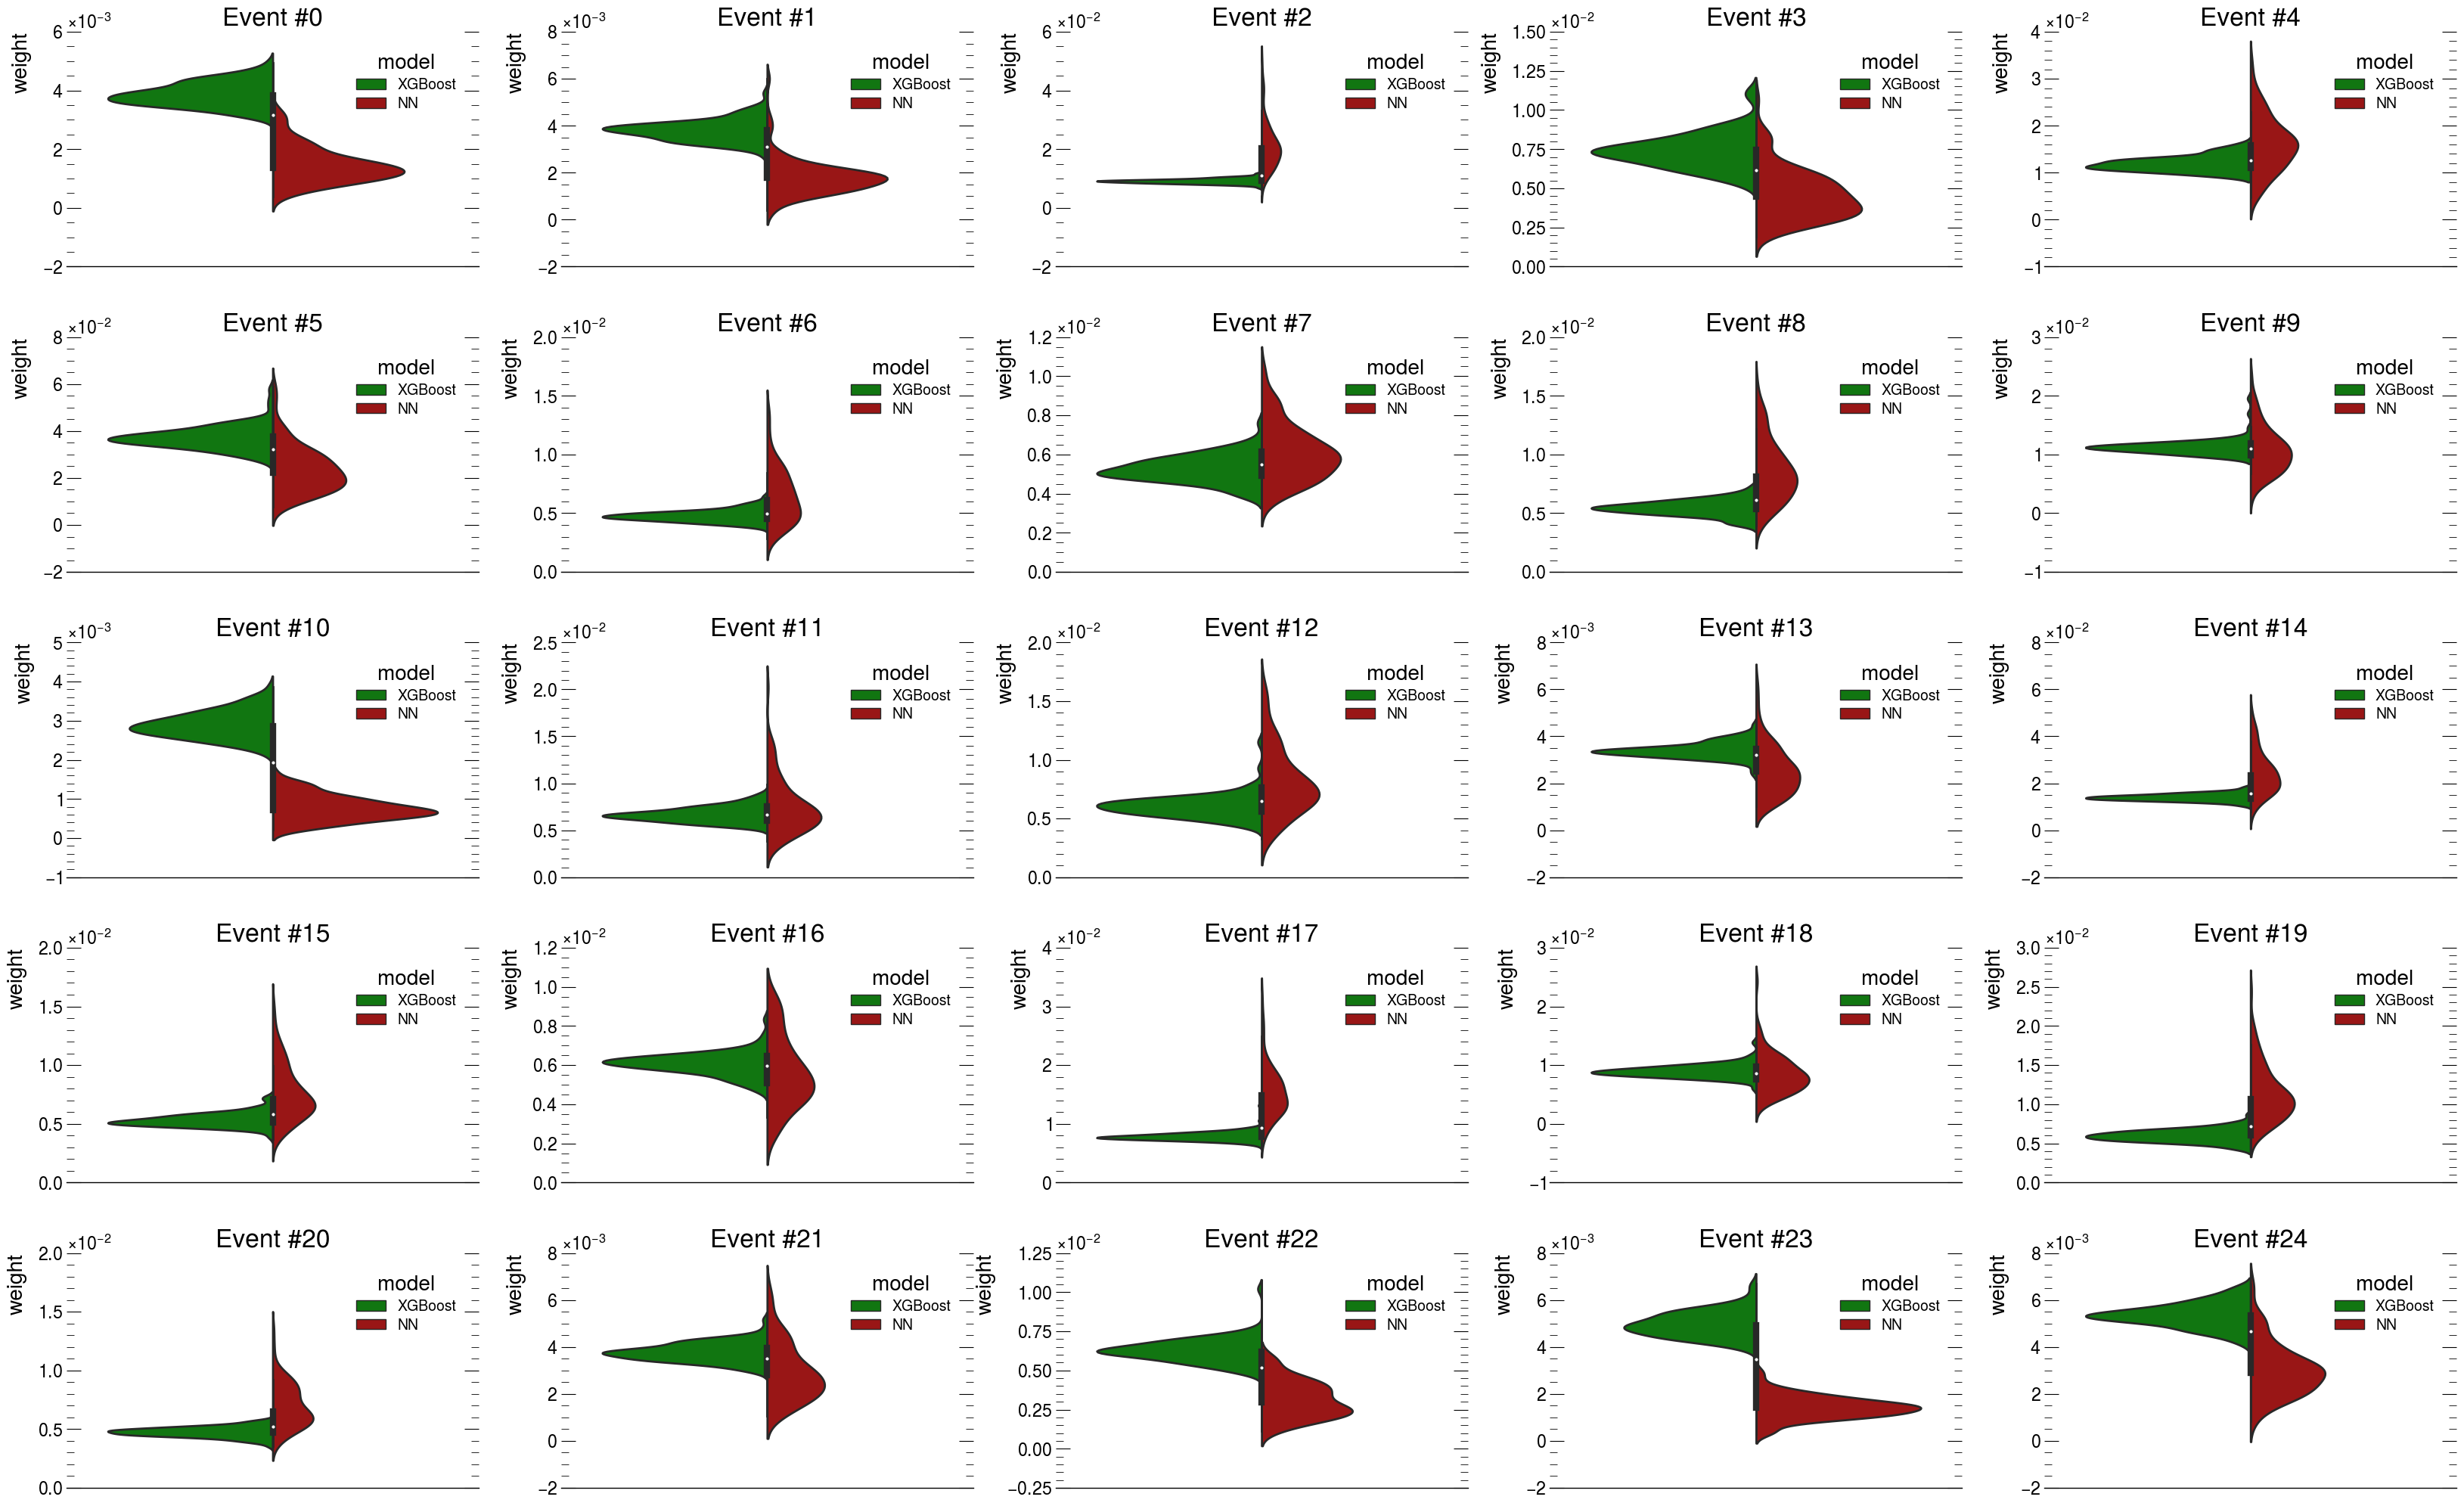

In [205]:
fig, axs = plt.subplots(5,5, figsize = (40, 25))
fig.subplots_adjust(hspace = .3)
axs = axs.ravel()

for i in range(25):
    #std = np.std(w_df.iloc[i,:].values)
    #iqr = np.subtract(*np.percentile((w_df.iloc[i,:].values), [75, 25]))
    
    sns.violinplot(x='event_num', y='weight', hue='model', data = melted[melted['event_num']==i+1], split = True, ax=axs[i])
    
    #sns.boxplot(x='event_num',y='weight',hue='model', data = melted[melted['event_num'] == i+1], ax = axs[i])

    #sns.boxplot(w_n.iloc[i,:].values, ax = axs[i], palette = 'Blues')
    #sns.boxplot(w.iloc[i, :].values, ax = axs[i])
    
    axs[i].set_title('Event #' + str(i) )#+ ' - ' + '$\sigma$={:.3f}'.format(std) + ' IQR: {:.3f}'.format(iqr))
    axs[i].get_xaxis().set_ticks([])
    axs[i].set_xticklabels([])
    axs[i].set(xticklabels=[])
    axs[i].get_xaxis().set_visible(False)
    sns.despine(left = True)




In [ ]:
ax = sns.violinplot(x="day", y="total_bill", hue="smoker",
...                     data=tips, palette="muted", split=True)


In [170]:
stack

event_number  run_number  NN_d24_weight  NN_d24_weight_resampling_0  \
51625      1114622507      300863       0.003642                    0.004160   
56382      2314266030      300863       0.003661                    0.003648   
68023      1078776538      300800       0.009361                    0.009376   
116400     3801044293      302300       0.007259                    0.008207   
152915     1640134395      301932       0.012954                    0.014923   
195236     4501734231      301973       0.036851                    0.035230   
240601     3456312365      302872       0.004305                    0.004557   
345274      496247271      303208       0.005866                    0.006238   
365694     6060159284      303846       0.005386                    0.006976   
380032     5040376759      303846       0.010134                    0.011486   
450808      404813266      304211       0.002560                    0.002396   
467404     4183031596      304008       0.006432                    0.006893   
482366     1154191784      304243       0.006105                    0.011510   
528624      625363610      305920       0.003108                    0.003777   
542362     1167371887      306278       0.012927                    0.016230   
551763      728951789      305723       0.005175                    0.004524   
602064     1322388195      307394       0.005928                    0.005855   
784699     2831356468      309440       0.007896                    0.008258   
788820     3751751775      309440       0.009116                    0.009403   
792380      700412925      309759       0.005823                    0.005121   
822850     3651167993      310341       0.004445                    0.004933   
866864     1152979942      311244       0.003872                    0.004347   
889245      176794720      310809       0.005563                    0.006197   
917628      609770457      311365       0.005109                    0.004630   
1042613     790891358      311287       0.005516                    0.004718   
51625      1114622507      300863       0.001358                    0.001198   
56382      2314266030      300863       0.000554                    0.001350   
68023      1078776538      300800       0.022049                    0.026599   
116400     3801044293      302300       0.004599                    0.003708   
152915     1640134395      301932       0.010071                    0.019310   
195236     4501734231      301973       0.023717                    0.034748   
240601     3456312365      302872       0.005520                    0.004489   
345274      496247271      303208       0.012478                    0.006409   
365694     6060159284      303846       0.007964                    0.007964   
380032     5040376759      303846       0.012923                    0.007665   
450808      404813266      304211       0.000378                    0.000337   
467404     4183031596      304008       0.006823                    0.007975   
482366     1154191784      304243       0.011474                    0.007818   
528624      625363610      305920       0.004545                    0.003161   
542362     1167371887      306278       0.028342                    0.015356   
551763      728951789      305723       0.008102                    0.005562   
602064     1322388195      307394       0.007309                    0.007377   
784699     2831356468      309440       0.009352                    0.014813   
788820     3751751775      309440       0.005256                    0.008599   
792380      700412925      309759       0.013816                    0.012948   
822850     3651167993      310341       0.006849                    0.004774   
866864     1152979942      311244       0.004239                    0.002821   
889245      176794720      310809       0.002619                    0.003993   
917628      609770457      311365       0.000625                    0.001571   
1042613  

<AxesSubplot:xlabel='event_num'>

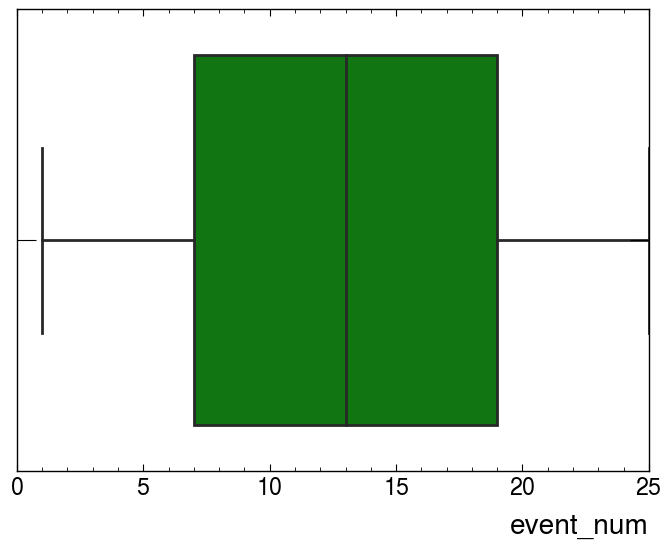

In [167]:
sns.boxplot(x='event_num', data = stack)

# IQR comparison

In [217]:
from scipy.stats import iqr

In [223]:
iqrs_25 = melted.groupby(['model','event_num'])['weight'].apply(lambda x: iqr(x)).reset_index()

In [229]:
iqrs_25[iqrs_25['model']=='NN']

model  event_num    weight
0     NN          1  0.000644
1     NN          2  0.000694
2     NN          3  0.008788
3     NN          4  0.002137
4     NN          5  0.007109
5     NN          6  0.012940
6     NN          7  0.003198
7     NN          8  0.001935
8     NN          9  0.003325
9     NN         10  0.004791
10    NN         11  0.000413
11    NN         12  0.002782
12    NN         13  0.002979
13    NN         14  0.001400
14    NN         15  0.010957
15    NN         16  0.002761
16    NN         17  0.002271
17    NN         18  0.004962
18    NN         19  0.004357
19    NN         20  0.003875
20    NN         21  0.002703
21    NN         22  0.001558
22    NN         23  0.001702
23    NN         24  0.000573
24    NN         25  0.001264

In [230]:
iqrs_25.loc[iqrs_25['model']=='NN','weight']

0     0.000644
1     0.000694
2     0.008788
3     0.002137
4     0.007109
5     0.012940
6     0.003198
7     0.001935
8     0.003325
9     0.004791
10    0.000413
11    0.002782
12    0.002979
13    0.001400
14    0.010957
15    0.002761
16    0.002271
17    0.004962
18    0.004357
19    0.003875
20    0.002703
21    0.001558
22    0.001702
23    0.000573
24    0.001264
Name: weight, dtype: float64

In [231]:
iqrs_25.loc[iqrs_25['model']=='XGBoost','weight']

25    0.000570
26    0.000524
27    0.000959
28    0.001335
29    0.002128
30    0.004968
31    0.000570
32    0.000898
33    0.000832
34    0.000998
35    0.000438
36    0.000975
37    0.001093
38    0.000329
39    0.001980
40    0.000710
41    0.000585
42    0.000806
43    0.001236
44    0.001124
45    0.000520
46    0.000560
47    0.000824
48    0.000776
49    0.000549
Name: weight, dtype: float64

In [232]:
ratios = iqrs_25.loc[iqrs_25['model']=='NN','weight'].values /iqrs_25.loc[iqrs_25['model']=='XGBoost','weight'].values

In [233]:
ratios

array([1.12988805, 1.32373691, 9.16803493, 1.6005929 , 3.34142399,
       2.60494435, 5.60670257, 2.15440489, 3.99754984, 4.80184387,
       0.94318852, 2.85347812, 2.72525461, 4.25135337, 5.53423472,
       3.88647482, 3.88317192, 6.15787398, 3.5259346 , 3.4480443 ,
       5.19380485, 2.78369128, 2.06550557, 0.7383915 , 2.30388362])

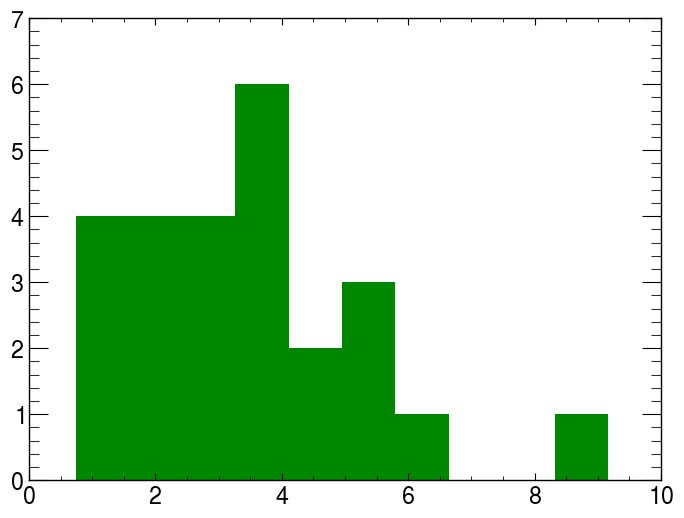

In [235]:
_ = plt.hist(ratios, bins = 10,)

# FULL IQRS

In [238]:
df.sort_values(by=['event_number','run_number'], inplace=True)

In [239]:
df.head()

event_number  run_number  NN_d24_weight  NN_d24_weight_resampling_0  \
215728         80223      302831       0.020926                    0.020267   
215726        136620      302831       0.005104                    0.004704   
235382        220246      303266       0.005371                    0.005855   
90862         270447      301915       0.004185                    0.004075   
215727        389817      302831       0.004236                    0.004468   

        NN_d24_weight_resampling_1  NN_d24_weight_resampling_2  \
215728                    0.023117                    0.023341   
215726                    0.005673                    0.005039   
235382                    0.005510                    0.006374   
90862                     0.004027                    0.004159   
215727                    0.004037                    0.004828   

        NN_d24_weight_resampling_3  NN_d24_weight_resampling_4  \
215728                    0.018277                    0.025921   
215726                    0.005404                    0.007297   
235382                    0.005866                    0.006058   
90862                     0.004292                    0.004065   
215727                    0.003832                    0.004624   

        NN_d24_weight_resampling_5  NN_d24_weight_resampling_6  ...  \
215728                    0.022540                    0.027499  ...   
215726                    0.004603                    0.005344  ...   
235382                    0.005704                    0.006116  ...   
90862                     0.004434                    0.003956  ...   
215727                    0.004556                    0.003933  ...   

        NN_d24_weight_resampling_90  NN_d24_weight_resampling_91  \
215728                     0.021015                     0.021836   
215726                     0.007189                     0.005764   
235382                     0.006412                     0.005260   
90862                      0.003795                     0.004409   
215727                     0.003996                     0.004808   

        NN_d24_weight_resampling_92  NN_d24_weight_resampling_93  \
215728                     0.016176                     0.018444   
215726                     0.005350                     0.006760   
235382                     0.006022                     0.005460   
90862                      0.004972                     0.005337   
215727                     0.004339                     0.004099   

        NN_d24_weight_resampling_94  NN_d24_weight_resampling_95  \
215728                     0.020977                     0.022925   
215726                     0.006253                     0.004705   
235382                     0.005010                     0.005569   
90862                      0.004798                     0.004527   
215727                     0.005563                     0.004262   

        NN_d24_weight_resampling_96  NN_d24_weight_resampling_97  \
215728                     0.021788                     0.019006   
215726                     0.005427                     0.005067   
235382                     0.005512                     0.005421   
90862                      0.004861                     0.004451   
215727                     0.004392                     0.004551   

        NN_d24_weight_resampling_98  NN_d24_weight_resampling_99  
215728                     0.021112                     0.018786  
215726                     0.005330                     0.005385  
235382                     0.005406                     0.005011  
90862                      0.003889                     0.004003  
215727                     0.003725                     0.004565  

[5 rows x 103 columns]

In [240]:
dfN.sort_values(by=['event_number','run_number'], inplace = True)

In [241]:
dfN.head()

event_number  run_number  NN_d24_weight  NN_d24_weight_resampling_0  \
215728         80223      302831       0.016711                    0.025473   
215726        136620      302831       0.006087                    0.012778   
235382        220246      303266       0.001572                    0.004415   
90862         270447      301915       0.000483                    0.001215   
215727        389817      302831       0.000860                    0.000898   

        NN_d24_weight_resampling_1  NN_d24_weight_resampling_2  \
215728                    0.032127                    0.037110   
215726                    0.015339                    0.009287   
235382                    0.002191                    0.002832   
90862                     0.001536                    0.001523   
215727                    0.001112                    0.001980   

        NN_d24_weight_resampling_3  NN_d24_weight_resampling_4  \
215728                    0.023314                    0.017143   
215726                    0.010674                    0.013089   
235382                    0.003494                    0.002767   
90862                     0.001001                    0.001858   
215727                    0.000898                    0.001218   

        NN_d24_weight_resampling_5  NN_d24_weight_resampling_6  ...  \
215728                    0.047454                    0.027738  ...   
215726                    0.007149                    0.009821  ...   
235382                    0.001260                    0.001304  ...   
90862                     0.000819                    0.000373  ...   
215727                    0.000958                    0.000226  ...   

        NN_d24_weight_resampling_90  NN_d24_weight_resampling_91  \
215728                     0.020130                     0.023311   
215726                     0.009216                     0.005715   
235382                     0.001969                     0.001469   
90862                      0.001591                     0.002812   
215727                     0.000799                     0.000652   

        NN_d24_weight_resampling_92  NN_d24_weight_resampling_93  \
215728                     0.027384                     0.034061   
215726                     0.005241                     0.010187   
235382                     0.001920                     0.002657   
90862                      0.000931                     0.002071   
215727                     0.000902                     0.001326   

        NN_d24_weight_resampling_94  NN_d24_weight_resampling_95  \
215728                     0.020149                     0.025635   
215726                     0.001509                     0.010498   
235382                     0.003026                     0.001765   
90862                      0.001177                     0.001262   
215727                     0.000659                     0.001249   

        NN_d24_weight_resampling_96  NN_d24_weight_resampling_97  \
215728                     0.019909                     0.031207   
215726                     0.005176                     0.007708   
235382                     0.001412                     0.001075   
90862                      0.000914                     0.001016   
215727                     0.001212                     0.000459   

        NN_d24_weight_resampling_98  NN_d24_weight_resampling_99  
215728                     0.029004                     0.037716  
215726                     0.009473                     0.012270  
235382                     0.001613                     0.001005  
90862                      0.001549                     0.000597  
215727                     0.000905                     0.000634  

[5 rows x 103 columns]

In [244]:
NN_iqr = iqr(dfN[keys].values, axis = 1)

In [245]:
NN_iqr

array([0.01010433, 0.00463139, 0.00098967, ..., 0.00304032, 0.00422884,
       0.00720503])

In [246]:
NN_iqr.shape

(1058574,)

In [247]:
XGB_iqr = iqr(df[keys].values, axis = 1)

In [248]:
XGB_iqr.shape

(1058574,)

In [249]:
R = NN_iqr / XGB_iqr

/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [250]:
R

array([3.16965596, 5.45124521, 1.35320761, ..., 2.16341129, 7.78090843,
       2.83561658])

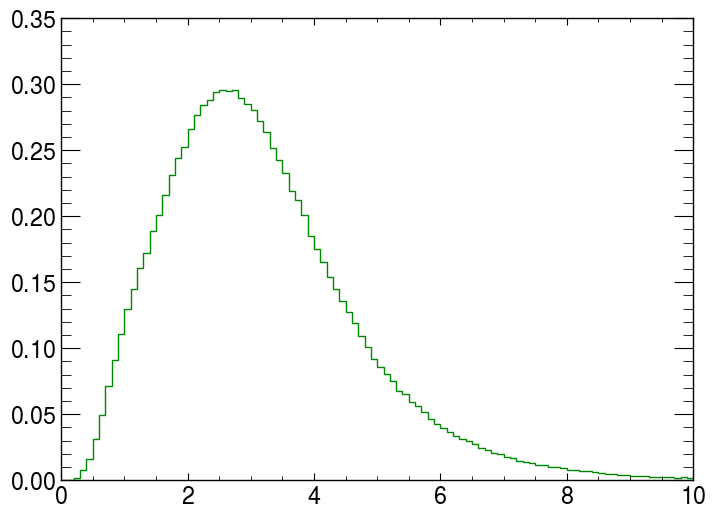

In [257]:
_ = plt.hist(R, bins = 100, range=(0, 10), histtype = 'step', density= True)

In [262]:
(R!=np.nan).sum()

1058574

In [265]:
_df_t = pd.DataFrame({'ratios': R})

In [267]:
_df_t.dropna()

ratios
0        3.169656
1        5.451245
2        1.353208
3        1.147303
4        0.938986
...           ...
1058569  2.366780
1058570  6.433690
1058571  2.163411
1058572  7.780908
1058573  2.835617

[1040347 rows x 1 columns]

Text(0.5, 1.0, 'IQR comparison between NN and XGBOOST')

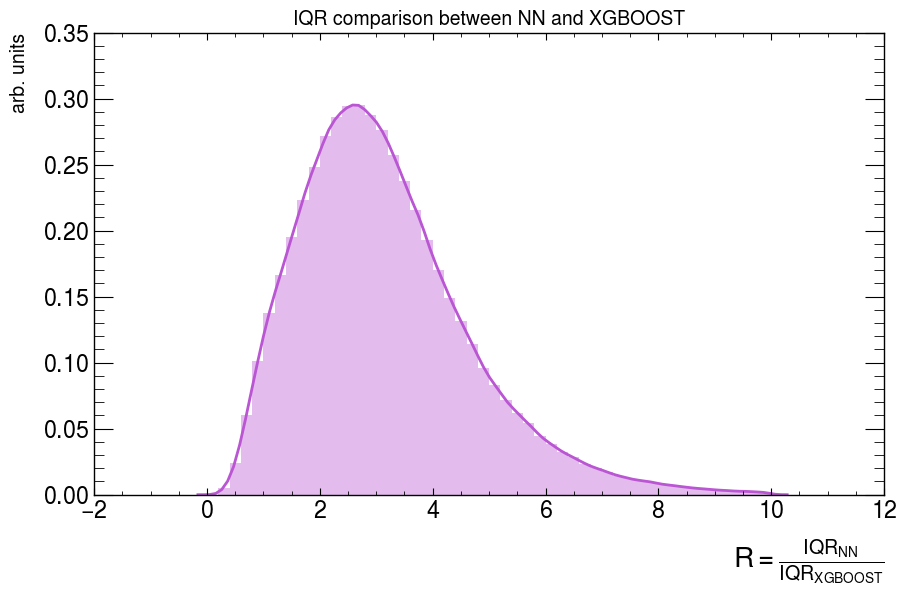

In [284]:
plt.subplots(figsize=(10,6))
sns.distplot(
    _df_t.loc[(_df_t["ratios"] >= 0) & (_df_t["ratios"] < 10), "ratios"]
    .dropna()
    .values,
    kde=True,
    hist_kws={"range": (0, 10)},
    color = 'mediumorchid'
)
plt.ylabel('arb. units', fontsize = 14)
plt.xlabel(r'$R = \frac{IQR_{NN}}{IQR_{XGBOOST}}$')
plt.title('IQR comparison between NN and XGBOOST', fontsize = 14)

# IQR [16, 84]

In [321]:
NN_iqr_exp

array([0.01499451, 0.00733896, 0.00156076, ..., 0.0045662 , 0.0066589 ,
       0.0104361 ])

In [322]:
NN_iqr

array([0.01010433, 0.00463139, 0.00098967, ..., 0.00304032, 0.00422884,
       0.00720503])

In [286]:
NN_iqr_exp = iqr(dfN[keys].values, rng=[16,84], axis = 1)

In [287]:
XGB_iqr_exp = iqr(df[keys].values, rng=[16,84], axis = 1)

In [288]:
R_exp = NN_iqr_exp / XGB_iqr_exp

/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [289]:
R_exp_df = pd.DataFrame({'ratios': R_exp})

Text(0.5, 1.0, 'IQR comparison between NN and XGBOOST')

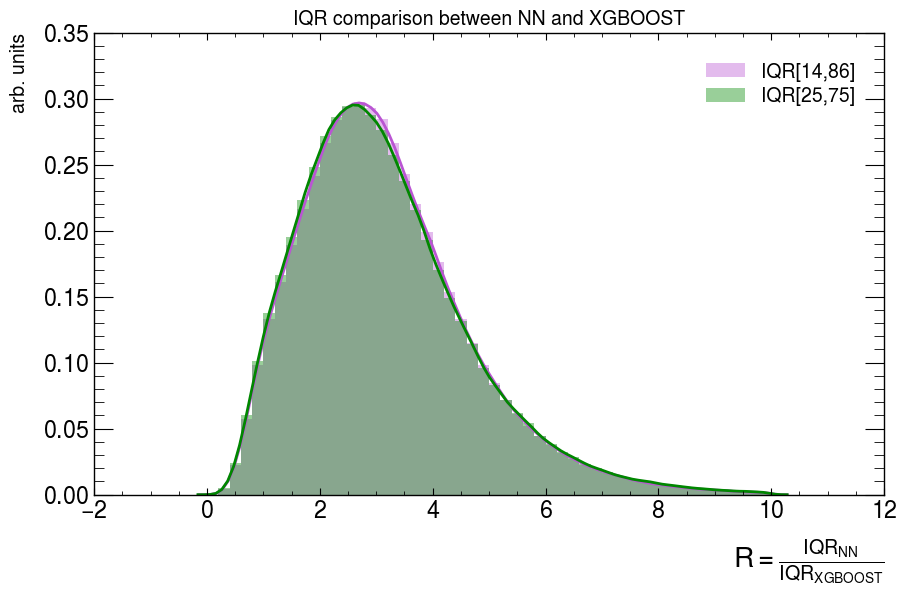

In [318]:
plt.subplots(figsize=(10,6))
sns.distplot(
    R_exp_df.loc[(R_exp_df["ratios"] >= 0) & (R_exp_df["ratios"] < 10), "ratios"]
    .dropna()
    .values,
    kde=True,
    hist_kws={"range": (0, 10)},
    color = 'mediumorchid',
    label="IQR[14,86]"
)
sns.distplot(
    _df_t.loc[(_df_t["ratios"] >= 0) & (_df_t["ratios"] < 10), "ratios"]
    .dropna()
    .values,
    kde=True,
    hist_kws={"range": (0, 10)},
    label = "IQR[25,75]"
)
plt.legend()
plt.ylabel('arb. units', fontsize = 14)
plt.xlabel(r'$R = \frac{IQR_{NN}}{IQR_{XGBOOST}}$')
plt.title('IQR comparison between NN and XGBOOST', fontsize = 14)

In [319]:
R_exp_df['ratios_nom'] = NN_iqr / XGB_iqr_exp

/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'IQR comparison between NN and XGBOOST')

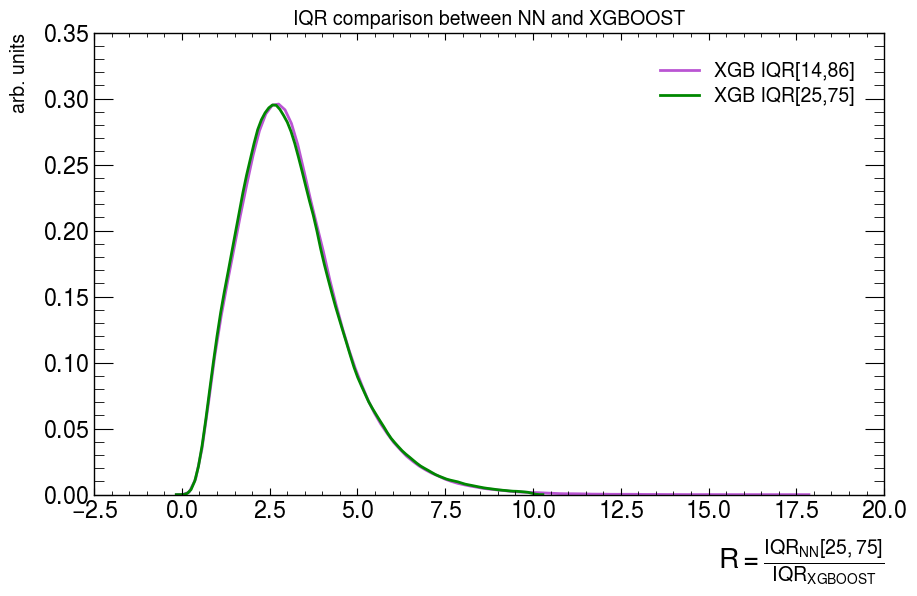

In [330]:
plt.subplots(figsize=(10,6))
sns.distplot(
    R_exp_df.loc[(R_exp_df["ratios_nom"] >= 0) & (R_exp_df["ratios_nom"] < 10), "ratios"]
    .dropna()
    .values,
    kde=True,
    hist_kws={"range": (0, 10)},
    color = 'mediumorchid',
    label="XGB IQR[14,86]",
    hist=False
)
sns.distplot(
    _df_t.loc[(_df_t["ratios"] >= 0) & (_df_t["ratios"] < 10), "ratios"]
    .dropna()
    .values,
    kde=True,
    hist_kws={"range": (0, 10)},
    label = "XGB IQR[25,75]",
    hist=False
)
plt.legend()
plt.ylabel('arb. units', fontsize = 14)
plt.xlabel(r'$R = \frac{IQR_{NN} [25, 75]}{IQR_{XGBOOST}}$')
plt.title('IQR comparison between NN and XGBOOST', fontsize = 14)

In [294]:
R_xgb = pd.DataFrame({'ratios':XGB_iqr_exp / XGB_iqr})

/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [323]:
R_NN = pd.DataFrame({'ratios': NN_iqr_exp/ NN_iqr})

/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'IQR comparison between IQR[25,75] and IQR[16, 84]')

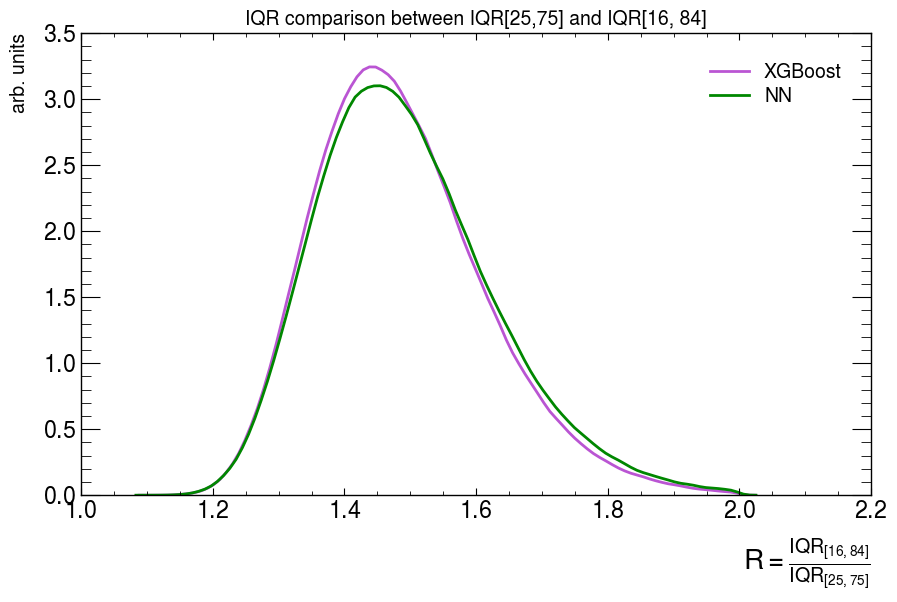

In [329]:
plt.subplots(figsize=(10,6))
sns.distplot(
    R_xgb.loc[(R_xgb["ratios"] >= 1) & (R_xgb["ratios"] < 2), "ratios"]
    .dropna()
    .values,
    kde=True,
    hist_kws={"range": (1, 2)},
    color = 'mediumorchid',
    label = 'XGBoost',
    hist=False
)
sns.distplot(
    R_NN.loc[(R_NN["ratios"] >= 1) & (R_NN["ratios"] < 2), "ratios"]
    .dropna()
    .values,
    kde=True,
    hist_kws={"range": (1, 2)},
    label = 'NN',
    hist=False
)

plt.legend()
plt.ylabel('arb. units', fontsize = 14)
plt.xlabel(r'$R = \frac{IQR_{[16, 84]}}{IQR_{[25,75]}}$')
plt.title('IQR comparison between IQR[25,75] and IQR[16, 84]', fontsize = 14)

### Debug-shota's sorted_jet_pt

In [302]:
def sorted_jet_pTs(full_data):
    pt_cols = ['pT_h1_j1', 'pT_h1_j2', 'pT_h2_j1', 'pT_h2_j2']
    sorted_pt_cols = np.argsort(-full_data[pt_cols].values,axis=1)
    pTs = full_data[pt_cols].values

    sorted_pTs = []
    for i in range(len(sorted_pt_cols)):
        sorted_pTs.append(pTs[i][sorted_pt_cols[i]])
    sorted_pTs = np.array(sorted_pTs)
    return sorted_pTs


In [303]:
d16_cr

run_number  event_number  pass_vbf_sel  mc_sf  trig_sf  jet_trig_sfs  \
0            298773        808585         False    1.0      1.0           1.0   
1            298773       1798465         False    1.0      1.0           1.0   
2            298773       1855518         False    1.0      1.0           1.0   
3            298773       1671576         False    1.0      1.0           1.0   
4            298773       1711116         False    1.0      1.0           1.0   
...             ...           ...           ...    ...      ...           ...   
1058569      310872    2056658727         False    1.0      1.0           1.0   
1058570      310872    2056230789         False    1.0      1.0           1.0   
1058571      310872    2059961684         False    1.0      1.0           1.0   
1058572      310872     752614167         False    1.0      1.0           1.0   
1058573      310872     752458951         False    1.0      1.0           1.0   

         truth_mhh  ntag  njets  kinematic_region  ...  \
0              0.0     2      4                 2  ...   
1              0.0     2      4                 2  ...   
2              0.0     2      4                 2  ...   
3              0.0     2      4                 2  ...   
4              0.0     2      5                 2  ...   
...            ...   ...    ...               ...  ...   
1058569        0.0     2      4                 2  ...   
1058570        0.0     2      4                 2  ...   
1058571        0.0     2      4                 2  ...   
1058572        0.0     2      4                 2  ...   
1058573        0.0     2      4                 2  ...   

         NN_d24_weight_resampling_90  NN_d24_weight_resampling_91  \
0                           0.006321                     0.005614   
1                           0.003292                     0.003347   
2                           0.006134                     0.006464   
3                           0.006620                     0.006703   
4                           0.072166                     0.073347   
...                              ...                          ...   
1058569                     0.003774                     0.004128   
1058570                     0.008870                     0.006634   
1058571                     0.006199                     0.005571   
1058572                     0.006753                     0.006739   
1058573                     0.004847                     0.004640   

         NN_d24_weight_resampling_92  NN_d24_weight_resampling_93  \
0                           0.006612                     0.005586   
1                           0.003346                     0.003289   
2                           0.006879                     0.007200   
3                           0.007158                     0.005476   
4                           0.074643                     0.064162   
...                              ...                          ...   
1058569                     0.003675                     0.003650   
1058570                     0.008607                     0.008417   
1058571                     0.005375                     0.005140   
1058572                     0.006553                     0.007459   
1058573                     0.004433                     0.004399   

         NN_d24_weight_resampling_94  NN_d24_weight_resampling_95  \
0                           0.005394                     0.006533   
1                           0.003533                     0.003775   
2                           0.007669                     0.006694   
3                           0.006445                     0.007033   
4                           0.077574                     0.046451   
...                              ...                          ...   
1058569                     0.003469                     0.004572   
1058570                     0.008886                     0.009036   
1058571                     0.005671                     0.0

In [304]:
a = sorted_jet_pTs(d16_cr)

In [305]:
a

array([[ 75.71716 ,  67.632034,  67.45694 ,  48.20426 ],
       [ 94.86102 ,  58.499325,  50.861057,  43.747925],
       [100.39419 ,  54.88494 ,  45.336864,  43.984   ],
       ...,
       [109.42629 ,  66.32447 ,  47.884083,  46.53714 ],
       [124.41236 ,  93.70102 ,  61.943382,  54.117622],
       [133.12878 ,  93.13931 ,  81.12733 ,  44.672203]], dtype=float32)

In [306]:
pt_cols = ['pT_h1_j1', 'pT_h1_j2', 'pT_h2_j1', 'pT_h2_j2']

In [311]:
b = np.sort(d16_cr[pt_cols], axis= 1)[:,::-1]

In [312]:
b

array([[ 75.71716 ,  67.632034,  67.45694 ,  48.20426 ],
       [ 94.86102 ,  58.499325,  50.861057,  43.747925],
       [100.39419 ,  54.88494 ,  45.336864,  43.984   ],
       ...,
       [109.42629 ,  66.32447 ,  47.884083,  46.53714 ],
       [124.41236 ,  93.70102 ,  61.943382,  54.117622],
       [133.12878 ,  93.13931 ,  81.12733 ,  44.672203]], dtype=float32)

In [315]:
a.shape

(1058574, 4)

In [314]:
b.shape

(1058574, 4)

In [316]:
np.array_equal(a, b)

True

### Debug clusters

In [344]:
clusters = f['sig'].clusters()

In [345]:
clusters

<generator object TTreeMethods.clusters at 0x7f55e5e63938>

In [346]:
clusters = list(clusters)

In [354]:
clusters[-1][-1]

390903

In [ ]:
new_clusters = []
for i, (x,y) in enumerate(clusters):
    print(i,x, y)
    x_new = clusters[i][0] if i!=0 else 0
    y_new = clusters[i+1][-1]
    new_clusters.append((x_new, y_new))
    if y_new >= clusters[-1][-1]:
        break

In [ ]:
new_clusters

In [ ]:
len(new_clusters)

In [360]:
len(clusters)

141

In [ ]:
dfN